# **<span style="color: blue;">Business Case: 📺 OTT Content Analysis</span>**

By Santanu Dash


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
netflix_raw = pd.read_csv("./netflix.csv")
netflix_raw.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


## **<span style="color: black;">Exploring The Data Set</span>**


In [25]:
netflix_raw.shape

(8807, 12)

In [26]:
netflix_raw.rename(columns={'cast': 'actor'}, inplace=True)

In [27]:
netflix_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   actor         7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


> Insight:

 * There is `8807` number of content avilable, with `12` criteria/ details for each content
 * All 12 criteria/ details are mentioned above


### Missing value detection & fill with relevent data.


In [28]:
netflix_raw.isnull().sum()

show_id            0
type               0
title              0
director        2634
actor            825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [29]:
netflix_raw['director'] = netflix_raw['director'].fillna("Unknown Director")
netflix_raw['actor'] = netflix_raw['actor'].fillna("Unknown Actor")
netflix_raw['country'] = netflix_raw['country'].fillna("Unknown Country")
netflix_raw['date_added']=netflix_raw['date_added'].fillna('0')          
netflix_raw['rating']=netflix_raw['rating'].fillna('Unknown Rating')      
netflix_raw['duration']=netflix_raw['duration'].fillna('Unknown Duration')

> Insight:

 * There is `2634` content avilable, with out **Director Details**.
 * There is `825` content avilable, with out **Actors Details**.
 * There is `831` content avilable, with out **Country Details**.
 * There is `10` content avilable, with out **Date Details** on which date that added to Netflix Platform.
 * There is `4` content avilable, with out **Rating Details** on which category they belongs to.
 * There is `3` content avilable, with out **Duration Details**.


### Conversion of categorical attributes to 'category'.


In [30]:
netflix_raw['type'] = netflix_raw['type'].astype('category')
netflix_raw['country'] = netflix_raw['country'].astype('category')
netflix_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   director      8807 non-null   object  
 4   actor         8807 non-null   object  
 5   country       8807 non-null   category
 6   date_added    8807 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8807 non-null   object  
 9   duration      8807 non-null   object  
 10  listed_in     8807 non-null   object  
 11  description   8807 non-null   object  
dtypes: category(2), int64(1), object(9)
memory usage: 736.1+ KB


> Insight:

 * '`Type`', 'Director', 'Cast/Actor', '`Country`', 'Rating', 'listed_in/Genre'  are Converted as Categorical Attributes.
 * Only `Type` & `Country` are Converted as Type Category.
 * Because C-C analysis like, 'Type-Rating' or 'Country-Release year' It brings all catogory to graph.


### Statistical summary of Data


In [31]:
netflix_raw.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Un-nesting Director Column


In [32]:
netflix_director = netflix_raw.copy()
netflix_director = netflix_director.loc[netflix_raw['director']!='Unknown Director']
netflix_director['director'] = netflix_director['director'].str.split(',')
netflix_director = netflix_director.explode('director')
netflix_director['director'] = netflix_director['director'].str.strip()

### Un-nesting Actor Column


In [33]:
netflix_actor = netflix_raw.copy()
netflix_actor = netflix_actor.loc[netflix_actor['actor']!='Unknown Actor']
netflix_actor['actor'] = netflix_actor['actor'].str.split(',')
netflix_actor = netflix_actor.explode('actor')
netflix_actor['actor'] = netflix_actor['actor'].str.strip()

### Un-nesting Country Column


In [34]:
netflix_country = netflix_raw.copy()
netflix_country = netflix_country.loc[netflix_raw['country']!='Unknown Country']
netflix_country['country'] = netflix_country['country'].str.split(',')
netflix_country = netflix_country.explode('country')
netflix_country['country'] = netflix_country['country'].str.strip()

### Un-nesting Date Added Column (Day, Month, Year, week_day)


In [35]:
netflix_date = netflix_raw.copy()
netflix_date = netflix_date.loc[netflix_raw['date_added']!='0']

netflix_date['date_added_utc'] = pd.to_datetime(netflix_date['date_added'])
netflix_date['add_year'] = netflix_date['date_added_utc'].dt.year
netflix_date['add_month_name'] = netflix_date['date_added_utc'].dt.month_name()
netflix_date['add_month'] = netflix_date['date_added_utc'].dt.month
netflix_date['add_day'] = netflix_date['date_added_utc'].dt.day
netflix_date['add_weekday'] = netflix_date['date_added_utc'].dt.day_name()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
netflix_date['add_weekday'] = pd.Categorical(netflix_date['add_weekday'], categories=weekday_order, ordered=True)

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
netflix_date['add_month_name'] = pd.Categorical(netflix_date['add_month_name'], categories=month_order, ordered=True)


### Un-nesting Listed In / Genre Column


In [36]:
netflix_genre = netflix_raw.copy()
netflix_genre['genre'] = netflix_genre['listed_in'].str.split(',')
netflix_genre = netflix_genre.explode('genre')
netflix_genre['genre'] = netflix_genre['genre'].str.strip()

### **<span style="color: yellow;">Range of Data</span>**


In [37]:
old_date = netflix_date['date_added_utc'].min()
latest_date = netflix_date['date_added_utc'].max()
print(f'Oldest Date of available record: {old_date}\nLatest Date of available record: {latest_date}')

Oldest Date of available record: 2008-01-01 00:00:00
Latest Date of available record: 2021-09-25 00:00:00


## **<span style="color: Cyan;">Analysis</span>**


In [38]:
netflix_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   director      8807 non-null   object  
 4   actor         8807 non-null   object  
 5   country       8807 non-null   category
 6   date_added    8807 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8807 non-null   object  
 9   duration      8807 non-null   object  
 10  listed_in     8807 non-null   object  
 11  description   8807 non-null   object  
dtypes: category(2), int64(1), object(9)
memory usage: 736.1+ KB


### **<span style="color: orange;">Type (Movie vs TV Show) </span>**


In [39]:
netflix_raw['type'].unique()

['Movie', 'TV Show']
Categories (2, object): ['Movie', 'TV Show']

In [40]:
netflix_raw['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

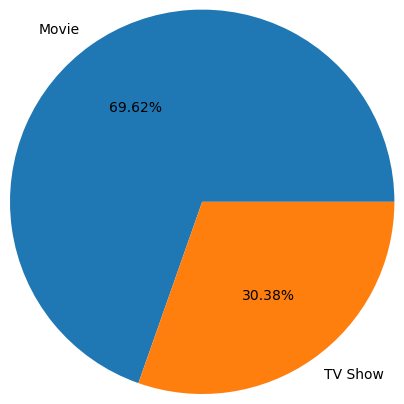

In [41]:
plt.pie(netflix_raw['type'].value_counts().values,labels = netflix_raw['type'].value_counts().index,radius = 1.3,autopct = '%1.2f%%',) # type: ignore
plt.show()

> Observation:

 * Netflix has about 69.62% of movies and 30.38% TV Shows

> Insight:

 * There is only 2 type of Contents. which are Movies & TV Show
 * There are 6131 `Movies` which is equivalent to 69.62%.
 * There are 2676 `TV Show` which is equivalent to 30.38%.


### **<span style="color: orange;">Title</span>**


In [42]:
netflix_raw['title'].nunique()

8807

In [43]:
netflix_raw['title'].value_counts()

Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: title, Length: 8807, dtype: int64

> Obersvation:

 * There are 8807 unique titles for each contents.


### **<span style="color: orange;">Based on Director</span>**


In [44]:
netflix_director['director'].nunique()

4993

In [45]:
netflix_director['director'].value_counts().reset_index()

,index,director
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Suhas Kadav,16
4,Marcus Raboy,16
...,...,...
4988,Raymie Muzquiz,1
4989,Stu Livingston,1
4990,Joe Menendez,1
4991,Eric Bross,1


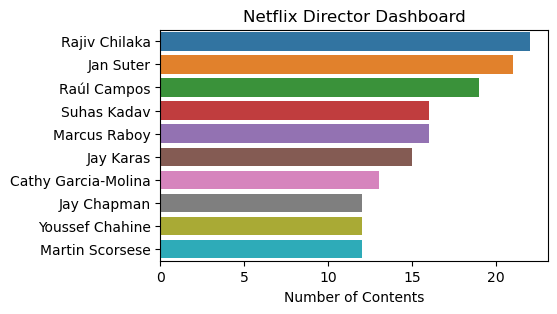

In [46]:
plt.figure(figsize=(5,3))
sns.barplot(data=netflix_director['director'].value_counts().reset_index()[:10], y='index', x='director')
plt.title('Netflix Director Dashboard', fontsize=12)
plt.ylabel('')
plt.xlabel('Number of Contents', fontsize=10)
plt.show()

### **<span style="color: orange;">Based on Actor</span>**


In [47]:
netflix_actor['actor'].nunique()

36439

In [48]:
netflix_actor['actor'].value_counts().reset_index()

,index,actor
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32
...,...,...
36434,Maryam Zaree,1
36435,Melanie Straub,1
36436,Gabriela Maria Schmeide,1
36437,Helena Zengel,1


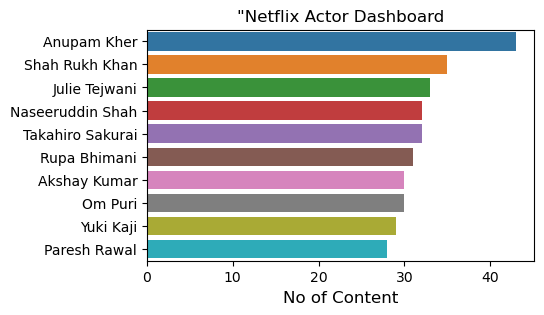

In [49]:
plt.figure(figsize=(5,3))
sns.barplot(data=netflix_actor['actor'].value_counts().reset_index()[:10], y='index', x='actor')
plt.title('"Netflix Actor Dashboard', fontsize=12)
plt.ylabel('')
plt.xlabel('No of Content', fontsize=12)
plt.show()

### **<span style="color: orange;">Based on Country</span>**


In [50]:
netflix_country['country'].nunique()

123

In [51]:
netflix_country['country'].value_counts().reset_index()

,index,country
0,United States,3690
1,India,1046
2,United Kingdom,806
3,Canada,445
4,France,393
...,...,...
118,Ecuador,1
119,Armenia,1
120,Mongolia,1
121,Bahamas,1


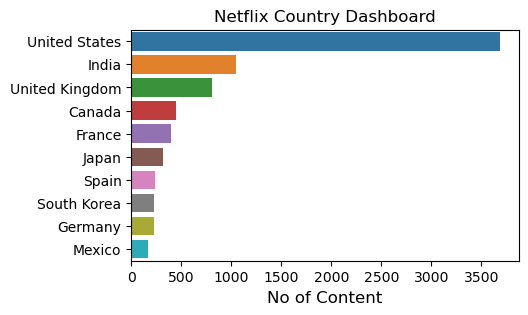

In [52]:
plt.figure(figsize=(5,3))
sns.barplot(data=netflix_country['country'].value_counts().reset_index()[:10], y='index', x='country')
plt.title('Netflix Country Dashboard', fontsize=12)
plt.ylabel('')
plt.xlabel('No of Content', fontsize=12)
plt.show()

### **<span style="color: orange;">Based on Date Added (Date on which added to Netflix)</span>**


In [53]:
print(f"Oldest Content on Netflix is: {netflix_date['date_added_utc'].min()}")
print(f"Latest Content on Netflix is: {netflix_date['date_added_utc'].max()}")

Oldest Content on Netflix is: 2008-01-01 00:00:00
Latest Content on Netflix is: 2021-09-25 00:00:00


In [54]:
netflix_date['date_added_utc'].nunique()

1714

In [55]:
netflix_date['date_added_utc'].value_counts().reset_index()

,index,date_added_utc
0,2020-01-01,110
1,2019-11-01,91
2,2018-03-01,75
3,2019-12-31,74
4,2018-10-01,71
...,...,...
1709,2017-02-21,1
1710,2017-02-07,1
1711,2017-01-29,1
1712,2017-01-25,1


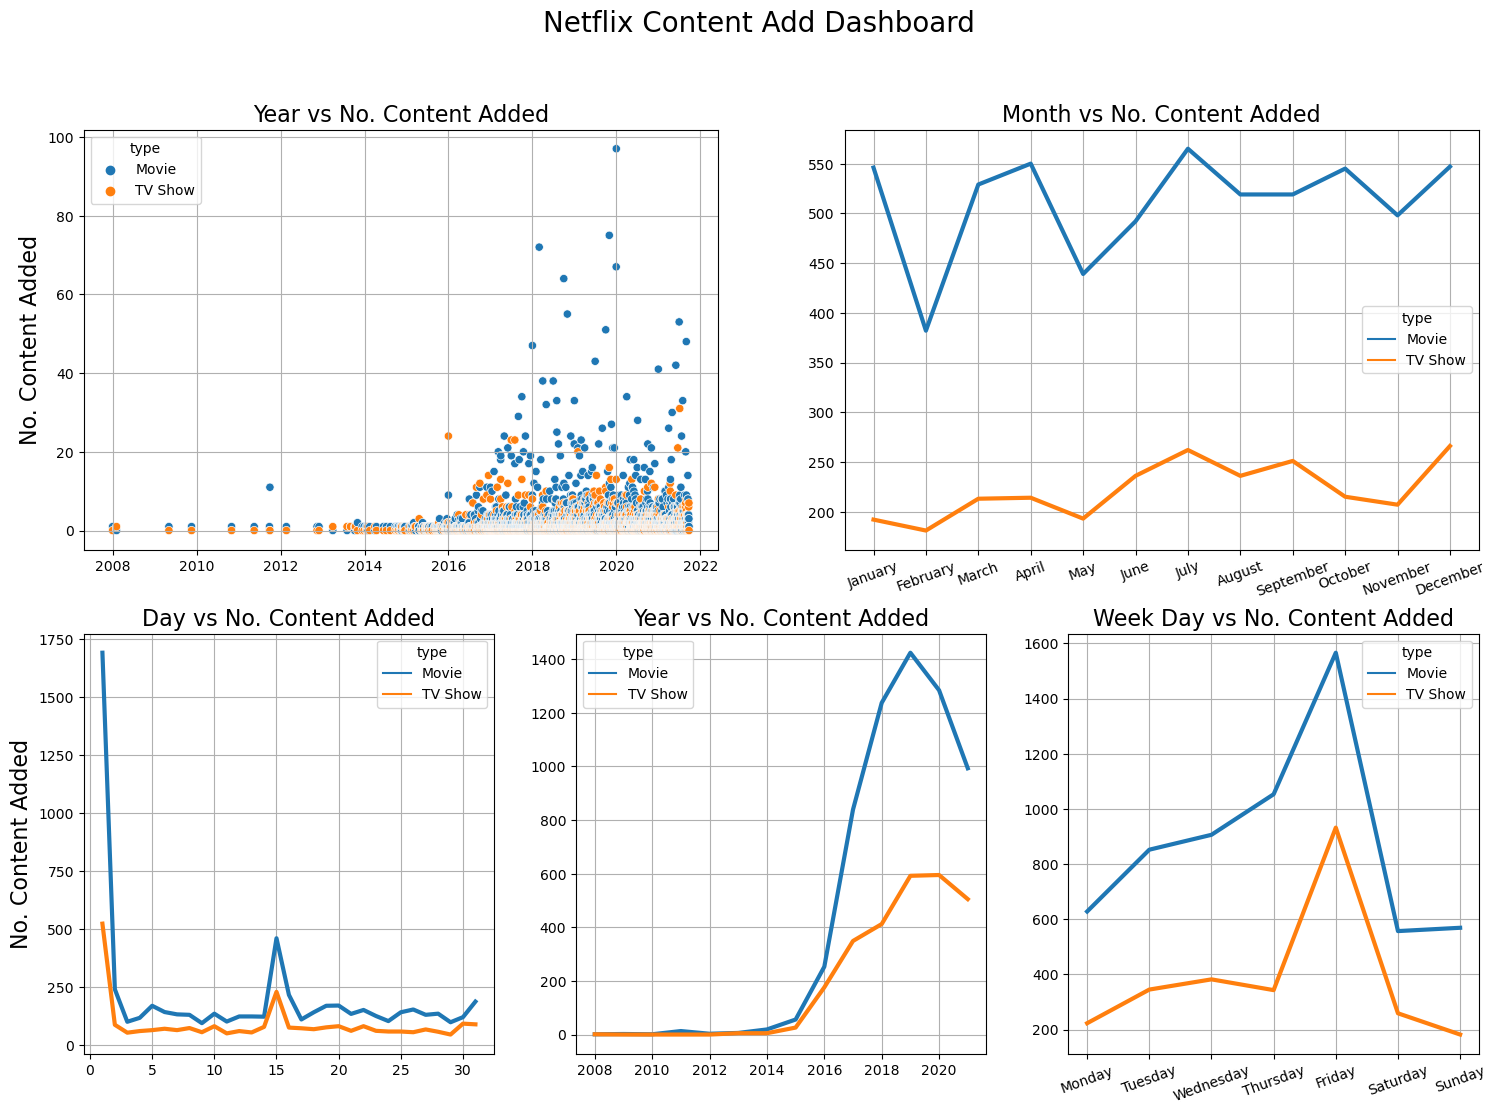

In [56]:
plt.figure(figsize=(18,12)).suptitle("Netflix Content Add Dashboard",fontsize=20)

plt.subplot(2, 2, 1)
plt.grid()
sns.scatterplot(data=netflix_date.groupby(['date_added_utc', 'type'])['title'].aggregate('nunique'
                ).reset_index(), x='date_added_utc', y='title', hue='type')
plt.title('Year vs No. Content Added', fontsize=16)
plt.xlabel('')
plt.ylabel('No. Content Added', fontsize=16)

plt.subplot(2, 2, 2)
plt.grid()
sns.lineplot(data=netflix_date.groupby(['add_month_name', 'type'])['title'].aggregate('nunique'
                ).reset_index(), x='add_month_name', y='title', hue='type', linewidth=3)
plt.title('Month vs No. Content Added', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation= 20)

plt.subplot(2, 3, 4)
plt.grid()
sns.lineplot(data=netflix_date.groupby(['add_day', 'type'])['title'].aggregate('nunique'
                ).reset_index(), x='add_day', y='title', hue='type', linewidth=3)
plt.title('Day vs No. Content Added', fontsize=16)
plt.xlabel('')
plt.ylabel('No. Content Added', fontsize=16)

plt.subplot(2, 3, 5)
plt.grid()
sns.lineplot(data=netflix_date.groupby(['add_year', 'type'])['title'].aggregate('nunique'
                ).reset_index(), x='add_year', y='title', hue='type', linewidth=3)
plt.title('Year vs No. Content Added', fontsize=16)
plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 3, 6)
plt.grid()
sns.lineplot(data=netflix_date.groupby(['add_weekday', 'type'])['title'].aggregate('nunique'
                ).reset_index(), x='add_weekday', y='title', hue='type', linewidth=3)
plt.title('Week Day vs No. Content Added', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation= 20)

plt.show()


> Insight:
 
 * Contents are added to Netflix Platform from `2008` upto `mid 2021`.
 * No of content add to Netflix grows significantly since `2014`.
 * Highest in Number of Movie added to Netflix around Year `2019`. and TV Show on Year `2019 & 2020`.
 * Here we have observed `+ve Co-Relation` between Year & No of content added during `2014 to 2019`.
>
 * Most of the Movie & TV Show are added to Netflix in `July` Month.
 * Found that in `Frebruary` Month very less Movie & TV Show are added to Netflix.
>
 * Most of the Movie & TV Show are added to Netflix during `Start` of a month fallowed by `Mid` of the Month.
 * Similarly, Most of the Movie & TV Show are added to Netflix on `Friday` fallowed by `Thursday`.

There are `1714` Unique Dates are available where Movie or TV Shows are Added to Netflix Platform.


### **<span style="color: orange;">Based on Release year</span>**


In [57]:
print(f"Oldest Content on Netflix is: {netflix_raw['release_year'].min()}")
print(f"Latest Content on Netflix is: {netflix_raw['release_year'].max()}")


Oldest Content on Netflix is: 1925
Latest Content on Netflix is: 2021


In [58]:
netflix_raw['release_year'].nunique()

74

In [59]:
netflix_raw['release_year'].value_counts().reset_index()

,index,release_year
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902
...,...,...
69,1959,1
70,1925,1
71,1961,1
72,1947,1


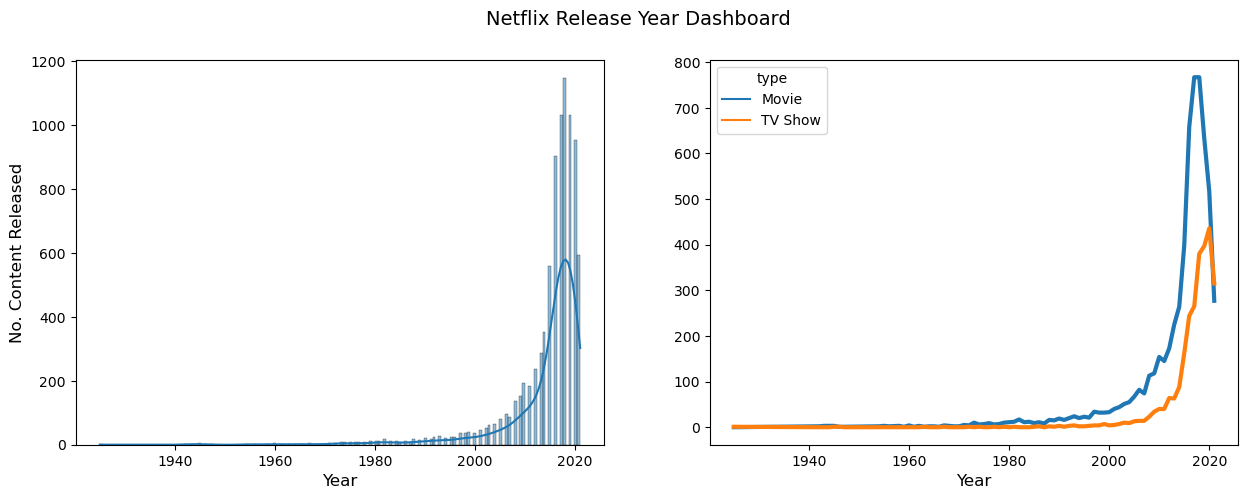

In [60]:
plt.figure(figsize=(15,5)).suptitle("Netflix Release Year Dashboard",fontsize=14)

plt.subplot(1, 2, 1)
sns.histplot(x=netflix_raw['release_year'], kde=True)
plt.xlabel('Year', fontsize=12)
plt.ylabel('No. Content Released', fontsize=12)

plt.subplot(1, 2, 2)
sns.lineplot(data=netflix_raw.groupby(['release_year', 'type'])['title'].aggregate('nunique'
                    ).reset_index(), x='release_year', y='title', hue='type', linewidth=3)
plt.xlabel('Year', fontsize=12)
plt.ylabel('', fontsize=12)

plt.show()


> Insight:
 * Range of Contents which are available at Netflix Platform is `1925 to 2021`.

>    Considering Available Content in NetFlix
 * Highest in Number of Movie released in Year `2019`. and TV Show in Year `2020` 
 * Here we have observed `+ve Co-Relation` between Year & No of content released during `2000 to 2019` 
 * Most No the Movie are released on `2017-2018`.
 * Most No the TV Show are released on `2020`.

 There are `74` Unique Year are available where Movie or TV Shows are released.

### **<span style="color: orange;">Based on Rating</span>**

In [61]:
netflix_raw['rating'].nunique()

18

In [62]:
netflix_raw['rating'].value_counts().reset_index()

,index,rating
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


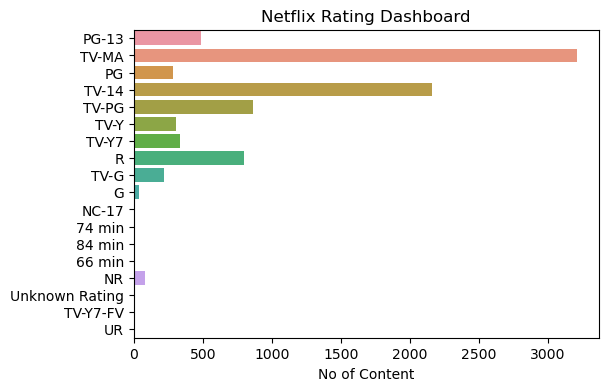

In [63]:
plt.figure(figsize=(6,4))
sns.countplot(y=netflix_raw['rating'])
plt.title('Netflix Rating Dashboard', fontsize=12)
plt.ylabel('', fontsize=10)
plt.xlabel('No of Content', fontsize=10)
plt.show()

### **<span style="color: orange;">Based on Duration</span>**


In [64]:
netflix_raw['duration'].nunique()

221

In [65]:
netflix_raw['duration'].value_counts().reset_index()

,index,duration
0,1 Season,1793
1,2 Seasons,425
2,3 Seasons,199
3,90 min,152
4,94 min,146
...,...,...
216,189 min,1
217,10 min,1
218,3 min,1
219,229 min,1


In [66]:
tvshow_duration = netflix_raw[netflix_raw['type']=='TV Show']
movie_duration = netflix_raw.copy().loc[netflix_raw['type']=='Movie']
movie_duration['duration_int'] = pd.to_numeric(movie_duration['duration'
                                    ].str.split(' ', expand=True)[0].replace('Unknown',0))

In [67]:
tvshow_duration['duration'].nunique()

15

In [68]:
tvshow_duration['duration'].value_counts().reset_index()[:3]

,index,duration
0,1 Season,1793
1,2 Seasons,425
2,3 Seasons,199


In [69]:
movie_duration['duration'].nunique()

206

In [70]:
movie_duration['duration'].value_counts().reset_index()

,index,duration
0,90 min,152
1,94 min,146
2,93 min,146
3,97 min,146
4,91 min,144
...,...,...
201,16 min,1
202,8 min,1
203,9 min,1
204,208 min,1


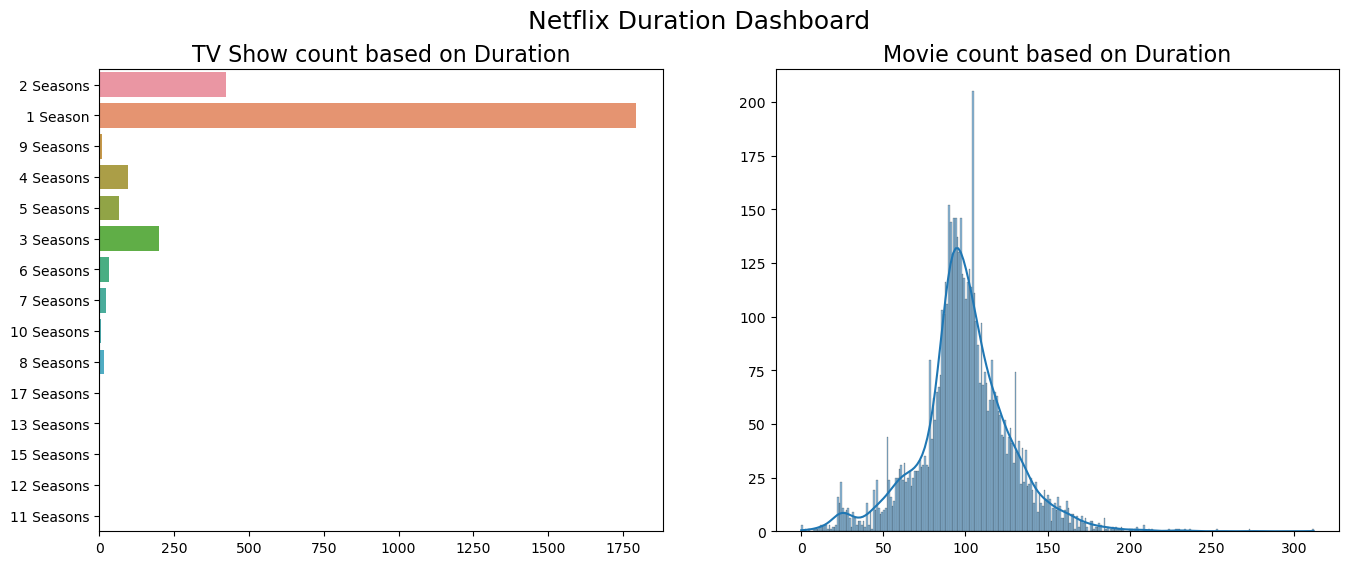

In [71]:
plt.figure(figsize=(16,6)).suptitle("Netflix Duration Dashboard",fontsize=18)

plt.subplot(1, 2, 1)
sns.countplot(y=tvshow_duration['duration']) # type: ignore
plt.title('TV Show count based on Duration', fontsize=16)
plt.ylabel('')
plt.xlabel('')

plt.subplot(1, 2, 2)
sns.histplot(x=movie_duration['duration_int'], bins=300, kde=True) # type: ignore
plt.title('Movie count based on Duration', fontsize=16)
plt.ylabel('')
plt.xlabel('')

plt.show()

> Insight:

 * Netflix have only `1 Seasons or 2 Seasons` for most of the TV Shows.
 * This States as TV Shows with `1 Seasons` are most Popular.
 * Most of the Movies in Netflix are of `90 min` duration fallowed by `94 & 93 min`.
 * This States as `around 90 min` duration movies are most Popular.

 There are `18` Unique Rating are available for Movies and TV Shows.



### **<span style="color: orange;">Based on Genre</span>**


In [72]:
netflix_genre['genre'].nunique()

42

In [73]:
netflix_genre['genre'].value_counts().reset_index()

,index,genre
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


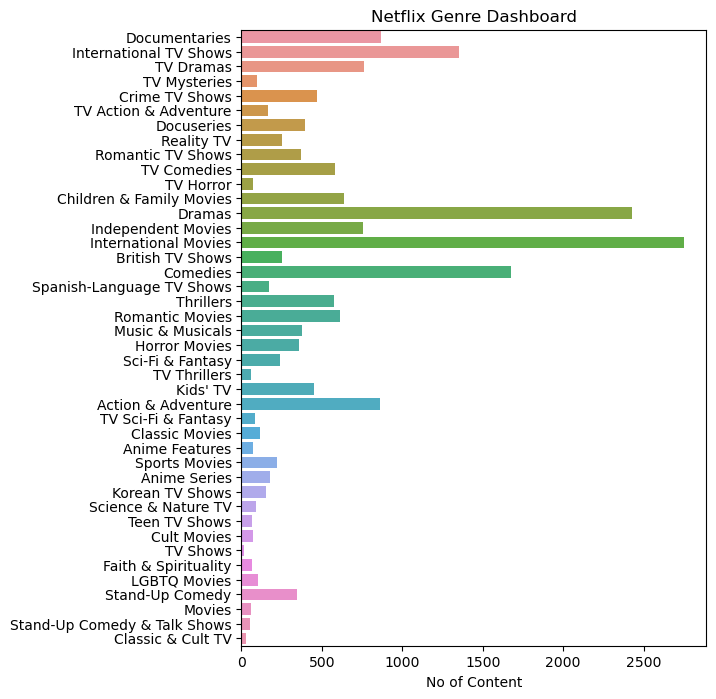

In [74]:
plt.figure(figsize=(6,8))
sns.countplot(y=netflix_genre['genre'])
plt.title('Netflix Genre Dashboard', fontsize=12)
plt.ylabel('', fontsize=10)
plt.xlabel('No of Content', fontsize=10)
plt.show()

> Insight:

 * `International Movies` Genre have highest number of contents as Movie. Fallowed by `Dramas & Comedies`.
 * `International TV Shows` Genre have highest number of TV Shows. Fallowed by `TV Dramas & TV Comedies`.
 * This states that `Dramas & Comedies` are the popular Genres.

  There are `42` Unique Genre are available for Movies and TV Shows.




## ****<span style="color: green;">Consolidated Data</span>**** `netflix_consolidated`

In [75]:
netflix_consolidated = netflix_raw.copy()

netflix_consolidated.insert(0, 'id', netflix_consolidated['show_id'].str.extract(
    '(\d+)', expand=False).astype(int))
netflix_consolidated.rename(columns=
    {
    'director': 'org_director',
    'actor': 'org_actor',
    'country': 'org_country'
    }, inplace=True)

un_dir = netflix_consolidated.loc[
    netflix_consolidated['org_director']=='Unknown Director']
netflix_consolidated = netflix_consolidated.loc[
    netflix_consolidated['org_director']!='Unknown Director']
netflix_consolidated['director'] = netflix_consolidated['org_director'].str.split(',')
netflix_consolidated = netflix_consolidated.explode('director')
netflix_consolidated['director'] = netflix_consolidated['director'].str.strip()
netflix_consolidated['director'] = netflix_consolidated['director'].astype('category')
netflix_consolidated = pd.concat([netflix_consolidated, un_dir])


un_actor = netflix_consolidated.loc[
    netflix_consolidated['org_actor']=='Unknown Actor']
netflix_consolidated = netflix_consolidated.loc[
    netflix_consolidated['org_actor']!='Unknown Actor']
netflix_consolidated['actor'] = netflix_consolidated['org_actor'].str.split(',')
netflix_consolidated = netflix_consolidated.explode('actor')
netflix_consolidated['actor'] = netflix_consolidated['actor'].str.strip()
netflix_consolidated['actor'] = netflix_consolidated['actor'].astype('category')
netflix_consolidated = pd.concat([netflix_consolidated, un_actor])

un_con = netflix_consolidated.loc[
    netflix_consolidated['org_country']=='Unknown Country']
netflix_consolidated = netflix_consolidated.loc[
    netflix_consolidated['org_country']!='Unknown Country']
netflix_consolidated['country'] = netflix_consolidated['org_country'].str.split(',')
netflix_consolidated = netflix_consolidated.explode('country')
netflix_consolidated['country'] = netflix_consolidated['country'].str.strip()
netflix_consolidated['country'] = netflix_consolidated['country'].astype('category')
netflix_consolidated = pd.concat([netflix_consolidated, un_con])

un_date_add = netflix_consolidated.loc[netflix_consolidated['date_added']=='0']
netflix_consolidated = netflix_consolidated.loc[netflix_consolidated['date_added']!='0']

netflix_consolidated['date_added_utc'] = pd.to_datetime(netflix_consolidated['date_added'])
netflix_consolidated['add_year'] = netflix_consolidated['date_added_utc'].dt.year
netflix_consolidated['add_month'] = netflix_consolidated['date_added_utc'].dt.month
netflix_consolidated['add_day'] = netflix_consolidated['date_added_utc'].dt.day
netflix_consolidated['add_month_name'] = netflix_consolidated['date_added_utc'].dt.month_name()
netflix_consolidated['add_weekday'] = netflix_consolidated['date_added_utc'].dt.day_name()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
netflix_consolidated['add_weekday'] = pd.Categorical(
    netflix_consolidated['add_weekday'], categories=weekday_order, ordered=True)
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
netflix_consolidated['add_month_name'] = pd.Categorical(
    netflix_consolidated['add_month_name'], categories=month_order, ordered=True)

netflix_consolidated = pd.concat([netflix_consolidated, un_date_add])

netflix_consolidated['duration_int'] = pd.to_numeric(
    netflix_consolidated['duration'].str.split(' ', expand=True)[0].replace('Unknown',0))

netflix_consolidated['genre'] = netflix_consolidated['listed_in'].str.split(',')
netflix_consolidated = netflix_consolidated.explode('genre')
netflix_consolidated['genre'] = netflix_consolidated['genre'].str.strip()
netflix_consolidated['genre'] = netflix_consolidated['genre'].astype('category')

netflix_consolidated = netflix_consolidated.sort_values('id').reset_index(drop=True)

In [76]:
netflix_consolidated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              202065 non-null  int32         
 1   show_id         202065 non-null  object        
 2   type            202065 non-null  category      
 3   title           202065 non-null  object        
 4   org_director    202065 non-null  object        
 5   org_actor       202065 non-null  object        
 6   org_country     202065 non-null  category      
 7   date_added      202065 non-null  object        
 8   release_year    202065 non-null  int64         
 9   rating          202065 non-null  object        
 10  duration        202065 non-null  object        
 11  listed_in       202065 non-null  object        
 12  description     202065 non-null  object        
 13  director        151422 non-null  category      
 14  actor           199916 non-null  cat

In [77]:
netflix_consolidated.columns

Index(['id', 'show_id', 'type', 'title', 'org_director', 'org_actor',
       'org_country', 'date_added', 'release_year', 'rating', 'duration',
       'listed_in', 'description', 'director', 'actor', 'country',
       'date_added_utc', 'add_year', 'add_month', 'add_day', 'add_month_name',
       'add_weekday', 'duration_int', 'genre'],
      dtype='object')

In [78]:
netflix_consolidated.nunique()

id                 8807
show_id            8807
type                  2
title              8807
org_director       4529
org_actor          7693
org_country         749
date_added         1768
release_year         74
rating               18
duration            221
listed_in           514
description        8775
director           4993
actor             36439
country             123
date_added_utc     1714
add_year             14
add_month            12
add_day              31
add_month_name       12
add_weekday           7
duration_int        211
genre                42
dtype: int64

In [79]:
# netflix_consolidated.loc[netflix_consolidated['title']=='Blood & Water'].sort_values('actor')

## **<span style="color: Red;">Q1. Which country has the number of movies released per year changed over the last 20-30 years?</span>**

> Problem Statement

 * Here We need to find out number of movie released in each country per year. (considering last 30 years `1991 - latest`)
 * For ease of visualization & understanding we will convert `country` to type 'object'.

> Basic Matrics

 * Filter the Consolidated / Un-nested Data set as Type `Movie` & release year grater then `1990`.
 * Find `Unique No of Countries` with in Data Set & Find Top 10 Countries.

In [80]:
movies_year = netflix_consolidated.copy().loc[
    (netflix_consolidated['type']=='Movie') & 
    (netflix_consolidated['release_year']>1990)
    ]
movies_year['country'] = movies_year['country'].astype(object)

###
> Pre Processing

 * `Group the Data set` with 'country','release_year' & aggregate as unique title count for each Combinations & store that in to '`movie_per_year_country`'.
 * Group the `movie_per_year_country` with 'country' after sort it by 'country', 'release_year.
 * Add a new column '`rate_of_change`' to `movie_per_year_country` as `differance of movie count` from previos year to current year at each country group.
 * Replace Null valus for `rate_of_change` column & sort it as descending order.
 * Then find` top_countries` which belongs to `Higher & lower *20*` rate_of_change.
 * Filter `movie_per_year_country` with countrirs which belongs to `top_countries.`
 

### Find Countries where higher change is obserbed

In [81]:
movie_per_year_country = movies_year.groupby(['country','release_year'])['title'].aggregate('nunique').reset_index(
                                            ).sort_values('title', ascending=False)
movie_per_year_country = movie_per_year_country.rename(columns = {'title':'movie_count'})
movie_per_year_country.sort_values(['country', 'release_year'], inplace=True)

grouped = movie_per_year_country.groupby('country')
movie_per_year_country['rate_of_change'] = grouped['movie_count'].diff()
movie_per_year_country['rate_of_change'].fillna(0, inplace=True)

movie_per_year_country.sort_values(['rate_of_change'], ascending=False, inplace=True)
movie_per_year_country

,country,release_year,movie_count,rate_of_change
834,United States,2016,283,114.0
835,United States,2017,360,77.0
833,United States,2015,169,54.0
338,India,2017,108,29.0
803,United Kingdom,2016,71,27.0
...,...,...,...,...
342,India,2021,25,-35.0
836,United States,2018,317,-43.0
837,United States,2019,268,-49.0
838,United States,2020,199,-69.0


In [82]:
top_conuntries = pd.concat([movie_per_year_country.head(20), movie_per_year_country.tail(20)]
                           ).groupby('country')['country'].nunique()

In [83]:
movie_per_year_country = movie_per_year_country.copy().loc[
    movie_per_year_country['country'].isin(top_conuntries.index)]
movie_per_year_country.sort_values(['country', 'release_year'], ascending=False, inplace=True)
movie_per_year_country.reset_index(drop=True, inplace=True)

### Understanding of Data Set

In [84]:
movies_year['country'].nunique()

115

In [85]:
movies_year['country'].value_counts()

United States     43120
India             20132
United Kingdom     8129
France             6485
Canada             5732
                  ...  
Panama                2
Botswana              2
Nicaragua             1
Kazakhstan            1
Uganda                1
Name: country, Length: 115, dtype: int64

In [86]:
movie_per_year_country.shape

(254, 4)

In [87]:
movie_per_year_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         254 non-null    object 
 1   release_year    254 non-null    int64  
 2   movie_count     254 non-null    int64  
 3   rate_of_change  254 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 8.1+ KB


In [88]:
movie_per_year_country.describe()

,release_year,movie_count,rate_of_change
count,254.000000,254.000000,254.000000
mean,2008.669291,21.216535,0.484252
std,8.282135,44.402627,15.551704
min,1991.000000,1.000000,-133.000000
25%,2003.000000,3.000000,-1.000000
50%,2010.000000,7.000000,0.000000
75%,2016.000000,20.000000,3.000000
max,2021.000000,360.000000,114.000000


In [89]:
movie_per_year_country['country'].nunique()

11

In [90]:
movie_per_year_country['country'].value_counts()

United States     31
United Kingdom    31
India             31
France            28
Germany           26
Canada            25
Spain             19
China             18
Indonesia         16
Philippines       15
Nigeria           14
Name: country, dtype: int64

In [91]:
movie_per_year_country['release_year'].nunique()

31

In [92]:
movie_per_year_country['release_year'].value_counts()

2020    11
2019    11
2018    11
2017    11
2016    11
2015    11
2014    11
2013    11
2011    11
2021    10
2012    10
2010    10
2009    10
2008    10
2003     9
2006     9
2005     8
2004     8
2007     8
2002     7
2000     7
1997     7
2001     6
1999     6
1998     6
1993     6
1994     4
1992     4
1991     4
1996     3
1995     3
Name: release_year, dtype: int64

### PLot the Graph

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


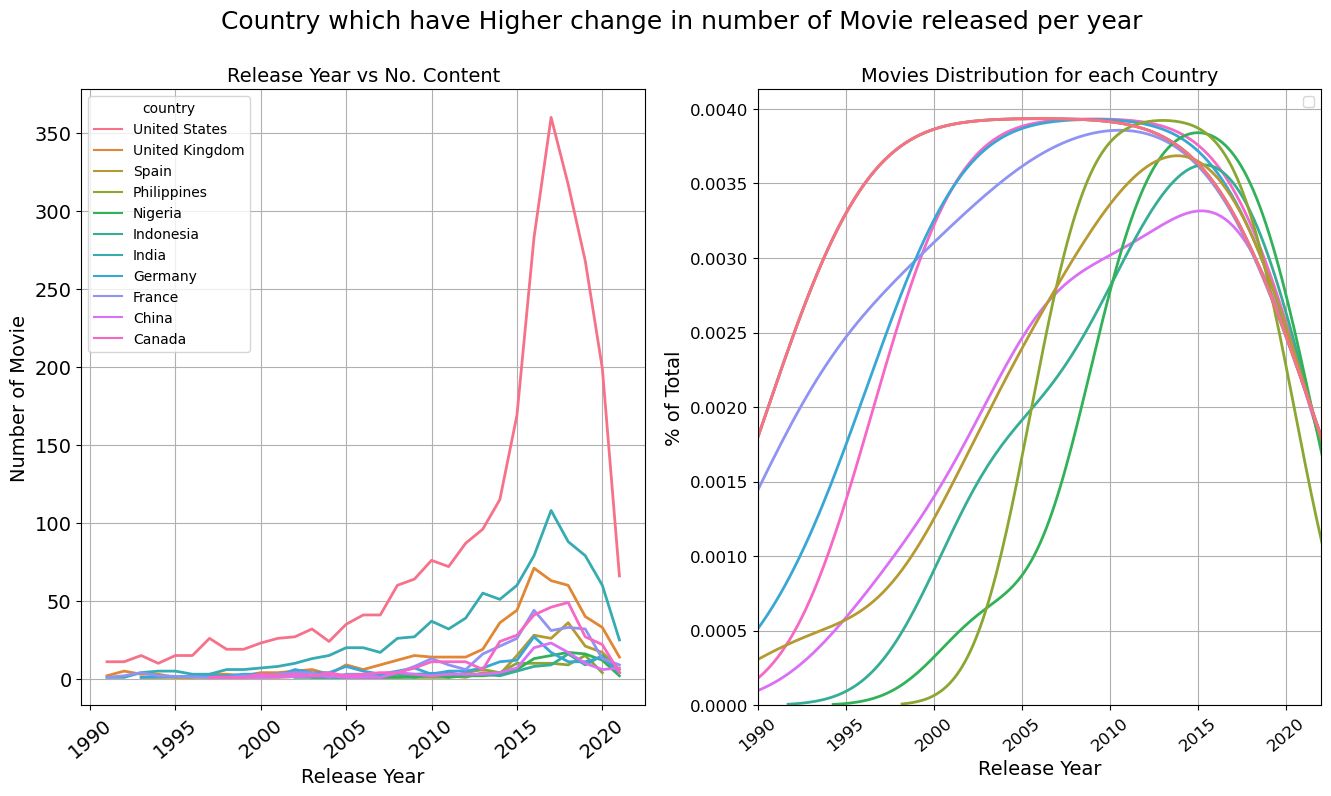

In [93]:
plt.figure(figsize=(16,8)).suptitle("Country which have Higher change in number of Movie released per year",fontsize=18)

plt.subplot(1, 2, 1)
plt.grid()
sns.lineplot(data=movie_per_year_country, x='release_year', y='movie_count', hue='country', linewidth=2)
plt.title('Release Year vs No. Content', fontsize=14)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Movie', fontsize=14)
plt.xticks(rotation= 40, fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(1, 2, 2)
plt.grid()
sns.kdeplot(data=movie_per_year_country, x='release_year', hue='country', linewidth=2)
plt.legend(loc=1)
plt.title('Movies Distribution for each Country', fontsize=14)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('% of Total', fontsize=14)
plt.xticks(rotation= 40, fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(left=1990, right=2022)

plt.show()


Text(0.5, 1.08, 'Country which have Higher rate of change in number of Movie released per year')

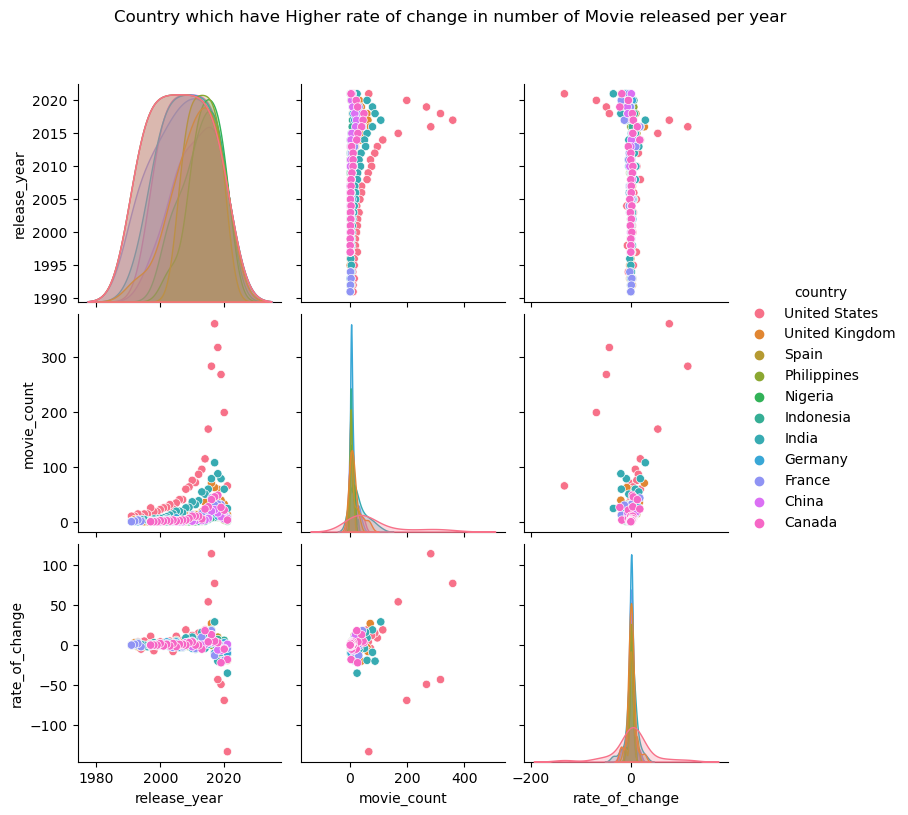

In [94]:
p = sns.pairplot(data=movie_per_year_country, hue='country')
p.fig.suptitle("Country which have Higher rate of change in number of Movie released per year", y=1.08) # y= some height>1

###
> Insights
    
 * The rate of movie released over year have the year range of 1991 to 'latest'.
 * We have observed that Number of movies released per year ranges between 0 to 360.
 * Where `United State` have highest number of movie releases, followed by 'India', 'United Kingdom', 'Canada' etc.
 
> Business Insights
 
 * Number of movie released over year increases since 1990 to 2015 and decreases after 2015.
 * Higher number of movies released between `2010 and 2017`.
 * `After 2017` we have seen a big fall (Number of movie release per year decresaes).
 * `TV Shows` might have effect on number of movie per year.

> Recommendations

 * 'Canada' have stedy market for movies.
 * Although United State obsered huge srink in movie market but it is still higher number of movie released per year.
 * Idia still have the 2nd position for number of movie released per year. 
    

## **<span style="color: Red;"> Q2. Comparison of TV Shows vs. Movies.</span>**

> Problem Statement

 * Here we need to compare Movie & TV Show in each criterias like. 
    - No of Content
    - Directors
    - Actors
    - Coutry
    - Release Year
    - Added to Nelflix
    - Genre
    - Rating

> Basic Matrics

 * Group the Consolidated / Un-nested Data on the `Type`.
 * Find `Unique count / nunique` 'title', 'director', 'actor', 'country', 'release_year', 'rating', 'genre', 'duration', 'date_added_utc', 'add_year', 'add_month', 'add_day', 'add_month_name', 'add_weekday', 'duration_int'.

In [95]:
grouped_type = netflix_consolidated.groupby('type')[
    ['title', 'director', 'actor', 'country', 'release_year', 'rating', 'genre', 'duration', 'date_added_utc',
      'add_year', 'add_month', 'add_day', 'add_month_name', 'add_weekday', 'duration_int']]

In [96]:
type_count = grouped_type.nunique()
type_count

,title,director,actor,country,release_year,rating,genre,duration,date_added_utc,add_year,add_month,add_day,add_month_name,add_weekday,duration_int
type,,,,,,,,,,,,,,,
Movie,6131,4777,25951,118,73,18,20,206,1533,14,12,31,12,7,206
TV Show,2676,299,14863,66,46,10,22,15,1012,10,12,31,12,7,15


###
> Pre Processing

 * `Group the Data set` with 'type','director' & aggregate as unique title count for each Combinations & store that in to 'director'.
 * Convert D=director type category to object. Then filter by 'Movie' & 'TV Show' to find `Top Director` in each category.

+ Silimar Actions will be done for:
    - Actors
    - Coutry
    - Release Year
    - Added to Nelflix ( year, month, weekday )
    - Genre
    - Rating
 

### Analyzing `Top` for TV show & Movie based on different Parameter

In [97]:
director = netflix_consolidated.groupby(['type', 'director']).aggregate(
    title_count = ('title','nunique'),
    ).reset_index()
director['director'] = director['director'].astype(object)
mDir = director.loc[director['type']=='Movie'].sort_values('title_count', ascending=False).head(1)
tvDir = director.loc[director['type']=='TV Show'].sort_values('title_count', ascending=False).head(1)

pd.concat([mDir, tvDir]).reset_index(drop=True)

,type,director,title_count
0,Movie,Rajiv Chilaka,22
1,TV Show,Alastair Fothergill,3


In [98]:
actor = netflix_consolidated.groupby(['type', 'actor']).aggregate(
    title_count = ('title','nunique'),
    ).reset_index()
actor['actor'] = actor['actor'].astype(object)
actor.rename(columns={'actor': 'actor'}, inplace=True)
mCast = actor.loc[actor['type']=='Movie'].sort_values('title_count', ascending=False).head(1)
tvCast = actor.loc[actor['type']=='TV Show'].sort_values('title_count', ascending=False).head(1)

pd.concat([mCast, tvCast]).reset_index(drop=True)

,type,actor,title_count
0,Movie,Anupam Kher,42
1,TV Show,Takahiro Sakurai,25


In [99]:
country = netflix_consolidated.groupby(['type', 'country']).aggregate(
    title_count = ('title','nunique'),
    ).reset_index()
country['country'] = country['country'].astype(object)
mCountry = country.loc[country['type']=='Movie'].sort_values('title_count', ascending=False).head(3)
tvCountry = country.loc[country['type']=='TV Show'].sort_values('title_count', ascending=False).head(3)

pd.concat([mCountry, tvCountry]).reset_index(drop=True)

,type,country,title_count
0,Movie,United States,2752
1,Movie,India,962
2,Movie,United Kingdom,534
3,TV Show,United States,938
4,TV Show,United Kingdom,272
5,TV Show,Japan,199


In [100]:
release_year = netflix_consolidated.groupby(['type', 'release_year']).aggregate(
    title_count = ('title','nunique'),
    ).reset_index()
release_year['release_year'] = release_year['release_year'].astype(object)
mrelease_year = release_year.loc[release_year['type']=='Movie'].sort_values('title_count', ascending=False)
tvrelease_year = release_year.loc[release_year['type']=='TV Show'].sort_values('title_count', ascending=False)

# mrelease_year['release_year'].min()
# mrelease_year['release_year'].max()
# tvrelease_year['release_year'].min()
# tvrelease_year['release_year'].max()
pd.concat([mrelease_year.head(1), tvrelease_year.head(1)]).reset_index(drop=True)

,type,release_year,title_count
0,Movie,2018,767
1,TV Show,2020,436


In [101]:
add_year = netflix_consolidated.groupby(['type', 'add_year']).aggregate(
    title_count = ('title','nunique'),
    ).reset_index()
add_year['add_year'] = add_year['add_year'].astype(object)
madd_year = add_year.loc[add_year['type']=='Movie'].sort_values('title_count', ascending=False).head(1)
tvadd_year = add_year.loc[add_year['type']=='TV Show'].sort_values('title_count', ascending=False).head(1)

pd.concat([madd_year, tvadd_year]).reset_index(drop=True)

,type,add_year,title_count
0,Movie,2019.0,1424
1,TV Show,2020.0,595


In [102]:
add_month_name = netflix_consolidated.groupby(['type', 'add_month_name']).aggregate(
    title_count = ('title','nunique'),
    ).reset_index()
add_month_name['add_month_name'] = add_month_name['add_month_name'].astype(object)
madd_month_name = add_month_name.loc[add_month_name['type']=='Movie'].sort_values('title_count', ascending=False).head(1)
tvadd_month_name = add_month_name.loc[add_month_name['type']=='TV Show'].sort_values('title_count', ascending=False).head(1)

pd.concat([madd_month_name, tvadd_month_name]).reset_index(drop=True)

,type,add_month_name,title_count
0,Movie,July,565
1,TV Show,December,266


In [103]:
add_weekday = netflix_consolidated.groupby(['type', 'add_weekday']).aggregate(
    title_count = ('title','nunique'),
    ).reset_index()
add_weekday['add_weekday'] = add_weekday['add_weekday'].astype(object)
madd_weekday = add_weekday.loc[add_weekday['type']=='Movie'].sort_values('title_count', ascending=False).head(1)
tvadd_weekday = add_weekday.loc[add_weekday['type']=='TV Show'].sort_values('title_count', ascending=False).head(1)

pd.concat([madd_weekday, tvadd_weekday]).reset_index(drop=True)

,type,add_weekday,title_count
0,Movie,Friday,1566
1,TV Show,Friday,932


In [104]:
duration = netflix_consolidated.groupby(['type', 'duration']).aggregate(
    title_count = ('title','nunique'),
    ).reset_index()
duration['duration'] = duration['duration'].astype(object)
mduration = duration.loc[duration['type']=='Movie'].sort_values('title_count', ascending=False).head(1)
tvduration = duration.loc[duration['type']=='TV Show'].sort_values('title_count', ascending=False).head(1)

pd.concat([mduration, tvduration]).reset_index(drop=True)

,type,duration,title_count
0,Movie,90 min,152
1,TV Show,1 Season,1793


In [105]:
rating = netflix_consolidated.groupby(['type', 'rating']).aggregate(
    title_count = ('title','nunique'),
    ).reset_index()
rating['rating'] = rating['rating'].astype(object)
mrating = rating.loc[rating['type']=='Movie'].sort_values('title_count', ascending=False).head(1)
tvrating = rating.loc[rating['type']=='TV Show'].sort_values('title_count', ascending=False).head(1)

pd.concat([mrating, tvrating]).reset_index(drop=True)

,type,rating,title_count
0,Movie,TV-MA,2062
1,TV Show,TV-MA,1145


In [106]:
genre = netflix_consolidated.groupby(['type', 'genre']).aggregate(
    title_count = ('title','nunique'),
    ).reset_index()
genre['genre'] = genre['genre'].astype(object)
mGenre = genre.loc[genre['type']=='Movie'].sort_values('title_count', ascending=False)[1:4]
tvGenre = genre.loc[genre['type']=='TV Show'].sort_values('title_count', ascending=False)[1:4]

pd.concat([mGenre, tvGenre]).reset_index(drop=True)


,type,genre,title_count
0,Movie,Dramas,2427
1,Movie,Comedies,1674
2,Movie,Documentaries,869
3,TV Show,TV Dramas,763
4,TV Show,TV Comedies,581
5,TV Show,Crime TV Shows,470


### Plot the Graph

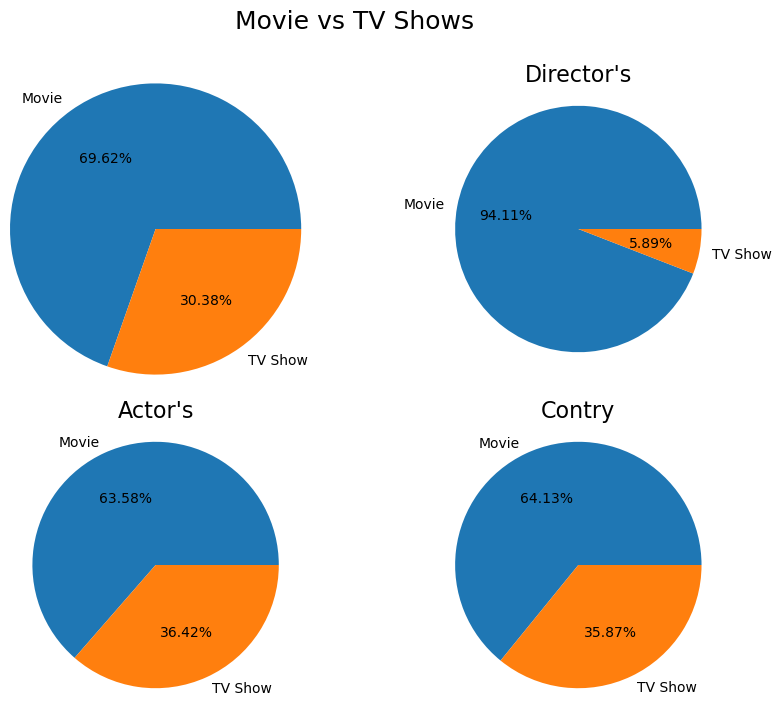

In [107]:

plt.figure(figsize=(10,8)).suptitle("Movie vs TV Shows",fontsize=18)

plt.subplot(2, 2, 1)
plt.pie(type_count['title'],labels = type_count.index,radius = 1.3 ,autopct = '%1.2f%%',) # type: ignore
plt.title('', fontsize=14)

plt.subplot(2, 2, 2)
plt.pie(type_count['director'],labels = type_count.index,radius = 1.1 ,autopct = '%1.2f%%',) # type: ignore
plt.title('Director\'s', fontsize=16)

plt.subplot(2, 2, 3)
plt.pie(type_count['actor'],labels = type_count.index,radius = 1.1 ,autopct = '%1.2f%%',) # type: ignore
plt.title('Actor\'s', fontsize=16)

plt.subplot(2, 2, 4)
plt.pie(type_count['country'],labels = type_count.index,radius = 1.1 ,autopct = '%1.2f%%',) # type: ignore
plt.title('Contry', fontsize=16)

plt.show()

###
> Insights
    
 * There are more Movies then TV Shows present at Netflix, like 
    * Number of movie is `6131` as (69.62%) 
    * Number of tv shows is `2676` as (30.38%) 
 * Maximun number of TV Show relesed on `2020` & Maximun number of Movie released on `2018`.
 * Where `United State` have highest number of Movie & TV Show Produced.
 * 'India', 'United Kingdom' are at 2nd & 3rd position for Number of `Movie`.
 * 'United Kingdom', 'Japan' are at 2nd & 3rd position for Number of `TV Show`.
 * `July` month registered maximum number of Movies added to Netflix as (565)
 * `December` month registered maximum number of TV Show added to Netflix as (266).
 * On `Friday` Maximum number of TV Shows & Movies are added to Netflix.
 * Most of the Movies & TV Shows are of`TV-MA` Rated.
 * Most of the Movies & TV Shows are of`Drama & Comedies` Genre.
 * TV Show with 1 season & Movie with 90 minute duration are popular. 

> Business Insights
 
 * Movies are have more market share the TV Shows.
 * Probebly Covid Pandemic increases no of TV Shows then Movies.
 * Similar to No of Director involved in Movies are significantly higher then the No of Director involved in TV Shows.
 * Although, there is a significant differance in no of Actors involved with Movies & Tv Show, this is not higher, It states several actors paticipate in both Movies & TV Shows.
 * United States is the most popular country in Netflix.
 * Here we observed that TV Shows are more engaging then Movies.

> Recommendationss

 * 'United State' origin Drama, Comedie genre's Movie & TV Shows are more popular .
 * Need to incourage TV Shows so it can have more engaging to viewer. 
    

## **<span style="color: Red;">Q3. Best time to lunch a TV Show</span>**

> Problem Statement

 * Here we need to find best Month, Weekday, and day of month to lunch a TV Show.
 * Here we observe the pattern of past TV Show Add date.

> Basic Matrics

 * Filter out Consolidated / Un-nested Data as TV Shows and valid date added contents stor that in `tvshow`.
 * Also, find no of reords with missing values.

In [108]:
tvshow = netflix_consolidated.copy().loc[(netflix_consolidated['type']=='TV Show')]

Find Number of Missing Date of Add

In [109]:
missing_values = netflix_consolidated.copy().loc[
    (netflix_consolidated['type']=='TV Show') & 
    (netflix_raw['date_added']=='0')
    ].reset_index()
missing_values['title'].nunique()

2

###
> Pre Processing

 * Group the 'tvshow' on the `add_month_name , add_weekday, add_day` individually & combined.
 * Find `Unique count / nunique` 'title'.

### Analyzing Month, Day, Weekday

In [110]:
month_lunch = tvshow.groupby(['add_month_name'])['title'].aggregate('nunique').reset_index()
month_lunch.rename(columns={'title': 'tvshow_count'}, inplace=True)
month_lunch.sort_values('tvshow_count', ascending=False).head(3)

,add_month_name,tvshow_count
11,December,266
6,July,262
8,September,251


In [111]:
weekday_lunch = tvshow.groupby(['add_weekday'])['title'].aggregate('nunique').reset_index()
weekday_lunch.rename(columns={'title': 'tvshow_count'}, inplace=True)
weekday_lunch.sort_values('tvshow_count', ascending=False).head(3)

,add_weekday,tvshow_count
4,Friday,932
2,Wednesday,382
1,Tuesday,345


In [112]:
day_lunch = tvshow.groupby(['add_day'])['title'].aggregate('nunique').reset_index()
day_lunch.rename(columns={'title': 'tvshow_count'}, inplace=True)
day_lunch.sort_values('tvshow_count', ascending=False).head(3)

,add_day,tvshow_count
0,1.0,522
14,15.0,228
29,30.0,91


In [113]:
tvshow_lunch = tvshow.groupby(['add_month_name', 'add_day', 'add_weekday']
                              )['title'].aggregate('nunique').reset_index()
tvshow_lunch.rename(columns={'title': 'tvshow_count'}, inplace=True)
tvshow_lunch.sort_values('tvshow_count', ascending=False).reset_index(drop=True).head(5)

,add_month_name,add_day,add_weekday,tvshow_count
0,January,1.0,Friday,32
1,July,6.0,Tuesday,31
2,August,1.0,Tuesday,23
3,July,1.0,Saturday,23
4,June,19.0,Saturday,21


### Understanding of Data Set

In [114]:
month_lunch.shape

(12, 2)

In [115]:
weekday_lunch.shape

(7, 2)

In [116]:
day_lunch.shape

(31, 2)

In [117]:
tvshow_lunch.shape

(2604, 4)

In [118]:
month_lunch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   add_month_name  12 non-null     category
 1   tvshow_count    12 non-null     int64   
dtypes: category(1), int64(1)
memory usage: 632.0 bytes


In [119]:
weekday_lunch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   add_weekday   7 non-null      category
 1   tvshow_count  7 non-null      int64   
dtypes: category(1), int64(1)
memory usage: 547.0 bytes


In [120]:
day_lunch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   add_day       31 non-null     float64
 1   tvshow_count  31 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 624.0 bytes


In [121]:
tvshow_lunch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604 entries, 0 to 2603
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   add_month_name  2604 non-null   category
 1   add_day         2604 non-null   float64 
 2   add_weekday     2604 non-null   category
 3   tvshow_count    2604 non-null   int64   
dtypes: category(2), float64(1), int64(1)
memory usage: 46.6 KB


In [122]:
month_lunch.describe()

,tvshow_count
count,12.000000
mean,222.166667
std,27.976722
min,181.000000
25%,203.500000
50%,214.500000
75%,239.750000
max,266.000000


In [123]:
weekday_lunch.describe()

,tvshow_count
count,7.000000
mean,380.857143
std,253.571442
min,182.000000
25%,241.000000
50%,343.000000
75%,363.500000
max,932.000000


In [124]:
day_lunch.describe()

,add_day,tvshow_count
count,31.000000,31.000000
mean,16.000000,86.000000
std,9.092121,86.812058
min,1.000000,44.000000
25%,8.500000,57.000000
50%,16.000000,66.000000
75%,23.500000,78.500000
max,31.000000,522.000000


In [125]:
tvshow_lunch.describe()

,add_day,tvshow_count
count,2604.00000,2604.000000
mean,16.00000,1.023810
std,8.94599,2.232416
min,1.00000,0.000000
25%,8.00000,0.000000
50%,16.00000,0.000000
75%,24.00000,1.000000
max,31.00000,32.000000


### Plot the Graph

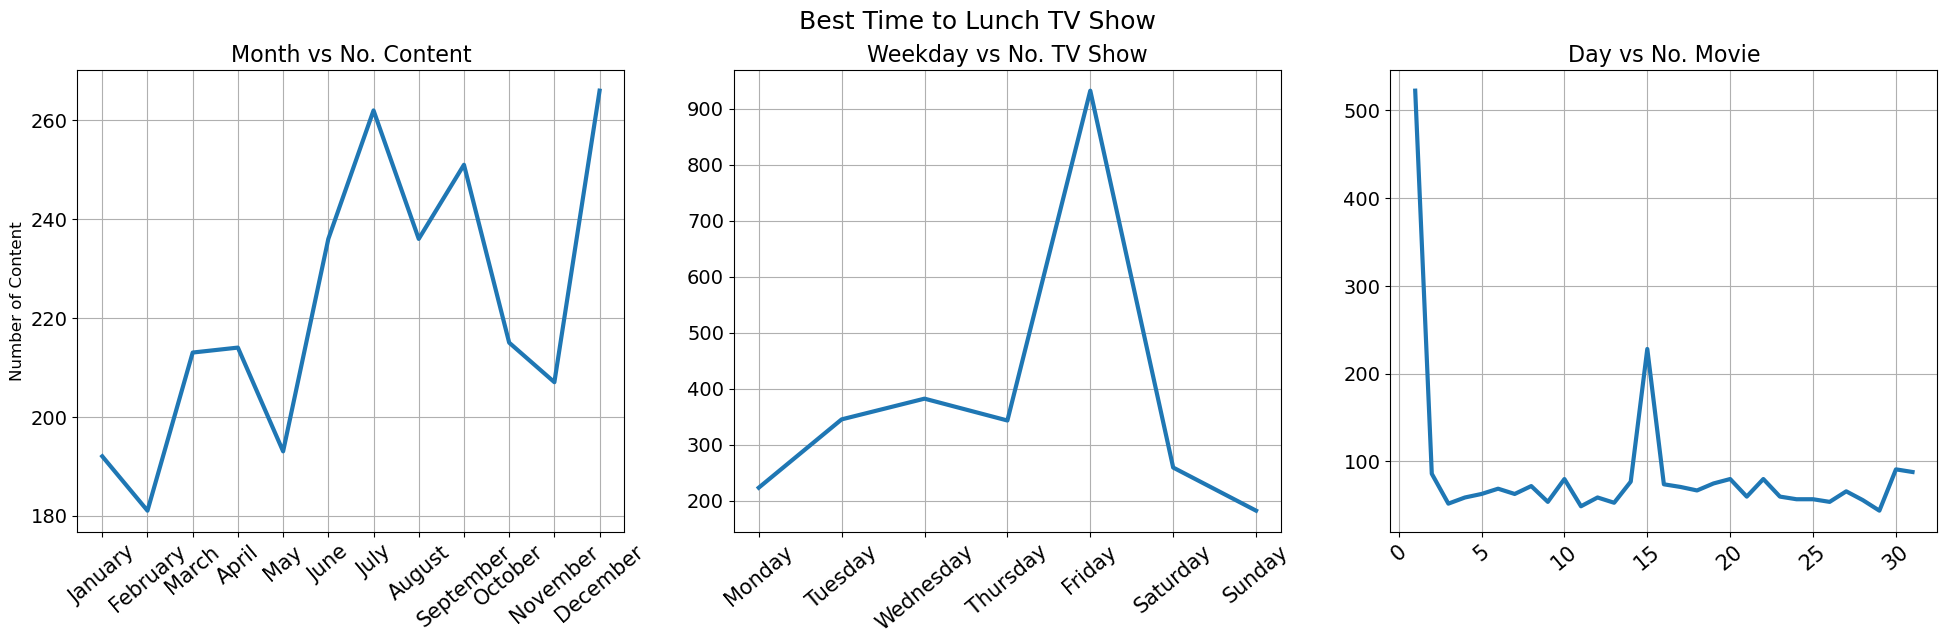

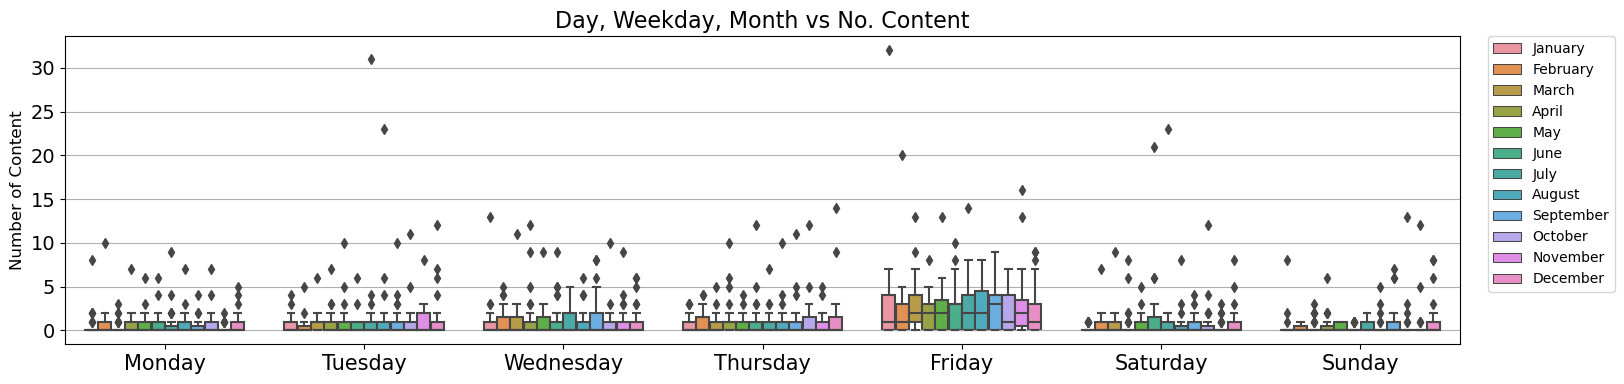

In [126]:
plt.figure(figsize=(24,6)).suptitle("Best Time to Lunch TV Show",fontsize=18)

plt.subplot(1, 3, 1)
plt.grid()
sns.lineplot(data=month_lunch, y='tvshow_count', x='add_month_name', linewidth=3)
plt.title('Month vs No. Content', fontsize=16)
plt.ylabel('Number of Content', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 40, fontsize=15)
plt.yticks(fontsize=14)

plt.subplot(1, 3, 2)
plt.grid()
sns.lineplot(data=weekday_lunch, y='tvshow_count', x='add_weekday', linewidth=3)
plt.title('Weekday vs No. TV Show', fontsize=16)
plt.ylabel('', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 40, fontsize=15)
plt.yticks(fontsize=14)

plt.subplot(1, 3, 3)
plt.grid()
sns.lineplot(data=day_lunch, y='tvshow_count', x='add_day', linewidth=3)
plt.title('Day vs No. Movie', fontsize=16)
plt.ylabel('', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 40, fontsize=15)
plt.yticks(fontsize=14)

plt.subplot(1, 3, 1)
plt.figure(figsize=(18,4))
plt.grid()
sns.boxplot(data=tvshow_lunch, y='tvshow_count', hue='add_month_name', x='add_weekday')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Day, Weekday, Month vs No. Content', fontsize=16)
plt.ylabel('Number of Content', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=14)

plt.show()

###
> Insight

 * Only `2` of the TV Show have missing Date of added to platform are missing.
 * There are several Outlier observed, out of them (Tuesday, Saturday)-(July, August), Friday-January are crucials.
 * `December` & `July` month have higher no. of TV Show added to Netflix (Cummulative). (from Month  vs No. Content)
 * Also, `Friday` & `Wednesday` have higher no. of TV Show added to Netflix (Cummulative). (from Weekday  vs No. Content)
 * And, `1st` & `15th` have higher no. of TV Show added to Netflix (Cummulative). (from Day  vs No. Content)
 * After combining Month & Weekday, found that `Friday-(August, July, September, January, March) & Wednesday-(September & July)` have recorded High.

> Business Insights
 * `Friday` is the most prferable day to add a TV Show.
 * `September, August, July` are most preferable month to add a TV Show. 
 * There are several out liears are present across All months & days, but `'Tuesday and Saturday of July & August' and ' Friday of January & Frebruary'` have higher impact. 
 
> Recommendations

 * Friday-August or Friday-September and Month Start like '1st' are the best.


## **<span style="color: Red;">Q4. Analysis of actors/directors of different types of shows/movies.</span>**

> Problem Statement

 * Here we need to find `Actors & Directors` who are part of of `Movie / TV Show`, filter them with `Rating & genre`.
 * We are lokking forward to find `Top 3` Actor & Director of `Top 5` Rating & Genre.

> Basic Matrics

 * Need to drop all null values belongs to `'director', 'actor', 'rating', 'genre'` and store as `actor_director`.
 * Sort the 'actor_director' as `'type', 'rating', 'genre'`. 
 * Conveert `Rating & Genre` to Object Type.

In [127]:
actor_director = netflix_consolidated.copy()
actor_director = actor_director.loc[
    (actor_director['rating']!='Unknown Rating') & 
    (actor_director['director']!='Unknown Director') & 
    (actor_director['actor']!='Unknown Actor')
    ]
actor_director.sort_values(['type', 'rating', 'genre'], inplace=True)
actor_director = actor_director[['id','type', 'rating', 'genre', 'title', 'director', 'actor',
                                 ]].reset_index(drop=True)
actor_director['rating'] = actor_director['rating'].astype(object)
actor_director['genre'] = actor_director['genre'].astype(object)
actor_director['director'] = actor_director['director'].astype(object)
actor_director['actor'] = actor_director['actor'].astype(object)
actor_director.rename(columns={'actor': 'actor'}, inplace=True)

###
> Pre Processing

 * Find Top 3 Rating & Genre for each type as 'top_movie_rating', 'top_movie_genre', 'top_tv_rating', 'top_tv_genre'.
 * By `Filtering` as Type & `Grouping` by Genre and Rating.
 * Aggregate as `No of Unique Title`, sort in Descending Order and `pick top 3` Rating or Genre. 
 * Filter out `actor_director` with all `top 3` Criteria. as `'actor_director_movie', 'actor_director_tv'`.
 * Then group the 'actor_director_movie' or 'actor_director_tv' with 'rating, genre, Actor or director' to find  `Top3` 'Actor & Director' for All TOP 3 'Genre & Rating' in TV Shows & Movies.
 * Plot the graph for Movie & TV Show Representing relation between Number of Director, Actor and Rating, Genre. 

### Understanding of Data Set

In [128]:
actor_director.shape

(201998, 7)

In [129]:
actor_director.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201998 entries, 0 to 201997
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   id        201998 non-null  int32   
 1   type      201998 non-null  category
 2   rating    201998 non-null  object  
 3   genre     201998 non-null  object  
 4   title     201998 non-null  object  
 5   director  151415 non-null  object  
 6   actor     199849 non-null  object  
dtypes: category(1), int32(1), object(5)
memory usage: 8.7+ MB


In [130]:
actor_director.describe()

,id
count,201998.000000
mean,4372.759483
std,2592.607399
min,1.000000
25%,2122.000000
50%,4330.000000
75%,6675.000000
max,8807.000000


In [131]:
actor_director['type'].nunique()

2

In [132]:
actor_director['type'].value_counts()

Movie      145908
TV Show     56090
Name: type, dtype: int64

In [133]:
actor_director['rating'].nunique()

17

In [134]:
actor_director['rating'].value_counts()

TV-MA       73915
TV-14       43957
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
74 min          1
84 min          1
66 min          1
Name: rating, dtype: int64

In [135]:
actor_director['genre'].nunique()

42

In [136]:
actor_director['genre'].value_counts()

Dramas                          29799
International Movies            28243
Comedies                        20829
International TV Shows          12823
Action & Adventure              12216
Independent Movies               9834
Children & Family Movies         9771
TV Dramas                        8942
Thrillers                        7107
Romantic Movies                  6412
TV Comedies                      4956
Crime TV Shows                   4733
Horror Movies                    4571
Kids' TV                         4561
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2409
Anime Series                     2291
TV Action & Adventure            2288
Spanish-Language TV Shows        2126
British TV Shows                 1808
Sports Movies                    1531
Classic Movies                   1443
TV Mysteries                     1281
Korean TV Shows                  1122
Cult Movies 

In [137]:
actor_director['title'].nunique()

8803

In [138]:
actor_director['title'].value_counts()

Kahlil Gibran's The Prophet             700
Holidays                                504
Movie 43                                468
The Eddy                                416
Narcos                                  378
                                       ... 
The Last Man on the Moon                  1
Stink!                                    1
Silicon Cowboys                           1
Secrets of the Tower of London            1
Louis C.K.: Live at the Comedy Store      1
Name: title, Length: 8803, dtype: int64

In [139]:
actor_director['director'].nunique()

4992

In [140]:
actor_director['director'].value_counts()

Martin Scorsese        419
Youssef Chahine        409
Cathy Garcia-Molina    356
Steven Spielberg       355
Lars von Trier         336
                      ... 
Smriti Keshari           1
Jeremy Seifert           1
Stephanie Soechtig       1
Damani Baker             1
Maïa Sandoz              1
Name: director, Length: 4992, dtype: int64

In [141]:
actor_director['actor'].nunique()

36428

In [142]:
actor_director['actor'].value_counts()

Liam Neeson         161
Alfred Molina       160
John Krasinski      139
Salma Hayek         130
Frank Langella      128
                   ... 
Waco O'Guin           1
Cedric Yarbrough      1
Julie Cox             1
Ray Fearon            1
Katia Gomez           1
Name: actor, Length: 36428, dtype: int64

### Movies

In [143]:
actor_director.copy().loc[actor_director['type']=='Movie']['rating'].nunique()

17

In [144]:
top_movie_rating =actor_director.copy().loc[actor_director['type']=='Movie'].groupby('rating').aggregate(
    title_count = ('title','nunique'),
    ).reset_index().sort_values('title_count', ascending=False).reset_index(drop=True)[:3]
top_movie_rating

,rating,title_count
0,TV-MA,2062
1,TV-14,1427
2,R,797


In [145]:
actor_director.copy().loc[actor_director['type']=='Movie']['genre'].nunique()

20

In [146]:
top_movie_genre =actor_director.copy().loc[actor_director['type']=='Movie'].groupby('genre').aggregate(
    title_count = ('title','nunique'),
    ).reset_index().sort_values('title_count', ascending=False).reset_index(drop=True)[:3]
top_movie_genre

,genre,title_count
0,International Movies,2752
1,Dramas,2426
2,Comedies,1674


#### Filtered Data Set of Movies with `TOP` Rating & Genre

In [147]:
actor_director_movie = actor_director.copy().loc[
    (actor_director['type']=='Movie') & 
    (actor_director['rating'].isin(top_movie_rating['rating'])) & 
    (actor_director['genre'].isin(top_movie_genre['genre']))
    ]

#### Movie Actors

In [148]:
movie_actors = actor_director_movie.groupby(['rating', 'genre', 'actor']).aggregate(
    movie_count=('title', 'nunique'),
    ).reset_index().sort_values(['rating', 'genre', 'movie_count'], ascending=False).reset_index(drop=True
    ).groupby(['rating', 'genre']).head(3).reset_index(drop=True
    )
movie_actors

,rating,genre,actor,movie_count
0,TV-MA,International Movies,Ramsey Nouah,11
1,TV-MA,International Movies,Adil Hussain,9
2,TV-MA,International Movies,Blossom Chukwujekwu,8
3,TV-MA,Dramas,Adil Hussain,10
4,TV-MA,Dramas,Naseeruddin Shah,8
5,TV-MA,Dramas,Seema Biswas,8
6,TV-MA,Comedies,Ramsey Nouah,8
7,TV-MA,Comedies,Carmen Machi,7
8,TV-MA,Comedies,Ayo Makun,6
9,TV-14,International Movies,Anupam Kher,27


In [149]:
movie_actors.groupby('actor').aggregate(
    repet=('movie_count', 'nunique'),
    movie_count=('movie_count', 'sum'),
    ).reset_index().sort_values(['repet', 'movie_count'], ascending=False).reset_index(drop=True)

,actor,repet,movie_count
0,Shah Rukh Khan,3,58
1,Anupam Kher,3,57
2,Naseeruddin Shah,2,23
3,Adil Hussain,2,19
4,Ramsey Nouah,2,19
5,Ben Mendelsohn,2,12
6,Kareena Kapoor,1,19
7,Boman Irani,1,11
8,Robert De Niro,1,9
9,Blossom Chukwujekwu,1,8


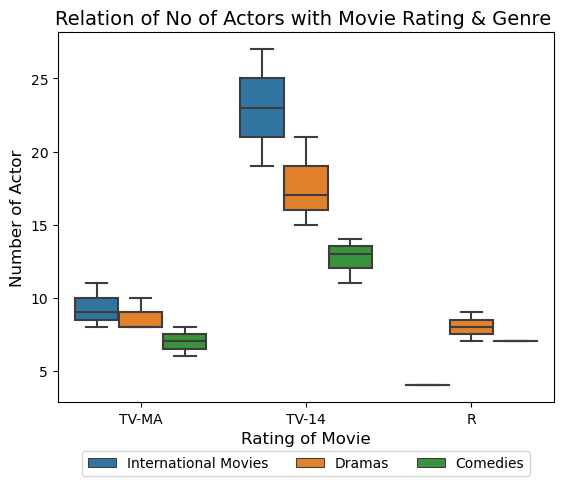

In [150]:
sns.boxplot(movie_actors, x='rating', y='movie_count', hue='genre')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc='lower center', borderaxespad=0, ncol=3)
plt.title('Relation of No of Actors with Movie Rating & Genre ', fontsize=14)
plt.xlabel('Rating of Movie', fontsize=12)
plt.ylabel('Number of Actor', fontsize=12)
plt.show()

#### Movie Directors

In [151]:
movie_directors = actor_director_movie.groupby(['rating', 'genre', 'director']).aggregate(
    movie_count = ('title','nunique'),
    ).reset_index().sort_values(['rating', 'genre', 'movie_count'], ascending=False).reset_index(drop=True
    ).groupby(['rating', 'genre']).head(3).reset_index(drop=True
    )
movie_directors

,rating,genre,director,movie_count
0,TV-MA,International Movies,Anurag Kashyap,6
1,TV-MA,International Movies,Rocky Soraya,6
2,TV-MA,International Movies,Hakan Algül,5
3,TV-MA,Dramas,Youssef Chahine,7
4,TV-MA,Dramas,Anurag Kashyap,4
5,TV-MA,Dramas,Ozan Açıktan,4
6,TV-MA,Comedies,Hakan Algül,5
7,TV-MA,Comedies,Fernando Ayllón,4
8,TV-MA,Comedies,Bedran Güzel,3
9,TV-14,International Movies,Umesh Mehra,8


In [152]:
movie_directors.groupby('director').aggregate(
    repet=('movie_count', 'nunique'),
    movie_count=('movie_count', 'sum'),
    ).reset_index().sort_values(['repet', 'movie_count'], ascending=False).reset_index(drop=True)

,director,repet,movie_count
0,Umesh Mehra,2,14
1,Cathy Garcia-Molina,2,12
2,Anurag Kashyap,2,10
3,Hakan Algül,1,10
4,Noah Baumbach,1,8
5,Kunle Afolayan,1,7
6,Martin Scorsese,1,7
7,Youssef Chahine,1,7
8,David Dhawan,1,6
9,Rocky Soraya,1,6


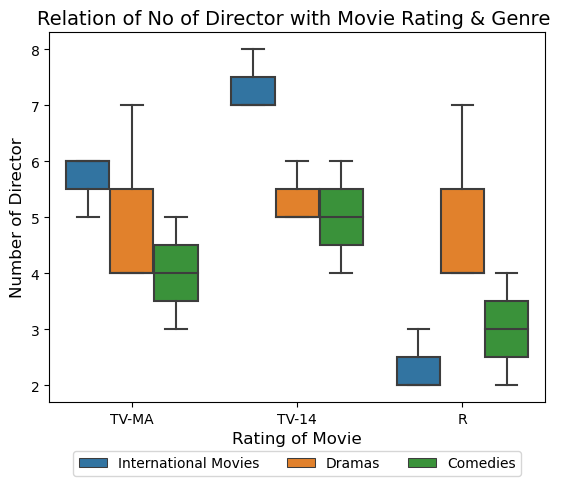

In [153]:
sns.boxplot(movie_directors, x='rating', y='movie_count', hue='genre')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc='lower center', borderaxespad=0, ncol=3)
plt.title('Relation of No of Director with Movie Rating & Genre ', fontsize=14)
plt.xlabel('Rating of Movie', fontsize=12)
plt.ylabel('Number of Director', fontsize=12)
plt.show()

### 
> Movie Insight

 * `'TV-MA', 'TV-14', 'R'` rated movies are most popular outof `17` unique rating.
 * `'International Movies', 'Dramas', 'Comedies'` are most popular genre's outof `20` unique genre.
 * Actors:
    * `'Ramsey Nouah', 'Adil Hussain', 'Blossom Chukwujekwu'` belong to 'TV-MA' & 'International Movies' which are Rank 1 Rating & Genre.
    * `'Shah Rukh Khan', 'Anupam Kher'` have 3 ranks each with 58 & 57 movies, who belongs to 'TV-14' Rating & All Top 3 Genre.
 * Directors:
    * `'Anurag Kashyap', 'Rocky Soraya', 'Hakan Algül'` belong to 'TV-MA' & 'International Movies' which are Rank 1 Rating & Genre.
    * `'Umesh Mehra', 'Cathy Garcia-Molina'`have 2 ranks each with 14 & 12 movies, who belongs to 'TV-14' Rating & 'International Movies', 'Dramas' Genre.
    * `'Anurag Kashyap'`have 2 ranks with 10 movies, who belongs to 'TV-MA' Rating & 'International Movies', 'Dramas' Genre.

> Business Insights
 * Higher number of Actors belongs to 'TV-MA' & 'International Movies'.
 * Popular Actors who belongs to 'TV-14' have higher number of movies.
 * Higher number of Director belongs to 'TV-MA' & 'International Movies'. also More directors are involved in 'Drama' genre.
 * Popular Directors who belongs to 'TV-14' have higher number of movies.
 
> Recommendations

 * 'Ramsey Nouah', 'Shah Rukh Khan', 'Anupam Kher' are more popular Actors.
 * 'Anurag Kashyap', 'Rocky Soraya', 'Umesh Mehra', 'Cathy Garcia-Molina' are more popular Director.
 * Movie with above Actor & Director combination might have more popularity.


### TV Show

In [154]:
actor_director.copy().loc[actor_director['type']=='TV Show']['rating'].nunique()

9

In [155]:
top_tv_rating =actor_director.copy().loc[actor_director['type']=='TV Show'].groupby('rating').aggregate(
    title_count = ('title','nunique'),
    ).reset_index().sort_values('title_count', ascending=False).reset_index(drop=True)[:3]
top_tv_rating

,rating,title_count
0,TV-MA,1145
1,TV-14,733
2,TV-PG,323


In [156]:
actor_director.copy().loc[actor_director['type']=='TV Show']['genre'].nunique()

22

In [157]:
top_tv_genre = actor_director.copy().loc[actor_director['type']=='TV Show'].groupby('genre').aggregate(
    title_count = ('title','nunique'),
    ).reset_index().sort_values('title_count', ascending=False).reset_index(drop=True)[:3]
top_tv_genre

,genre,title_count
0,International TV Shows,1350
1,TV Dramas,763
2,TV Comedies,580


#### Filtered Data Set of TV Show with `TOP` Rating & Genre

In [158]:
actor_director_tv = actor_director.copy().loc[
    (actor_director['type']=='TV Show') & 
    (actor_director['rating'].isin(top_tv_rating['rating'])) & 
    (actor_director['genre'].isin(top_tv_genre['genre']))
    ]

#### TV Show Actors

In [159]:
tv_actors = actor_director_tv.groupby(['rating', 'genre', 'actor']).aggregate(
    tvshow_count = ('title','nunique'),
    ).reset_index().sort_values(['rating', 'genre', 'tvshow_count'], ascending=False).reset_index(drop=True
    ).groupby(['rating', 'genre']).head(3).reset_index(drop=True
    )
tv_actors

,rating,genre,actor,tvshow_count
0,TV-PG,TV Dramas,Amit Behl,2
1,TV-PG,TV Dramas,Fawad Khan,2
2,TV-PG,TV Dramas,Figaro Tseng,2
3,TV-PG,TV Comedies,Antonio Banderas,3
4,TV-PG,TV Comedies,Mike Myers,3
5,TV-PG,TV Comedies,Seth Rogen,3
6,TV-PG,International TV Shows,David Attenborough,4
7,TV-PG,International TV Shows,Amit Behl,2
8,TV-PG,International TV Shows,Bettany Hughes,2
9,TV-MA,TV Dramas,Giancarlo Esposito,4


In [160]:
tv_actors.groupby('actor').aggregate(
    repet=('tvshow_count', 'nunique'),
    movie_count=('tvshow_count', 'sum'),
    ).reset_index().sort_values(['repet', 'movie_count'], ascending=False).reset_index(drop=True)

,actor,repet,movie_count
0,Tay Ping Hui,2,17
1,Takahiro Sakurai,1,14
2,Jun Fukuyama,1,10
3,Yuki Kaji,1,10
4,Ai Kayano,1,9
5,Junichi Suwabe,1,8
6,Jeanette Aw,1,7
7,Zhang Zhenhuan,1,7
8,Amit Behl,1,4
9,David Attenborough,1,4


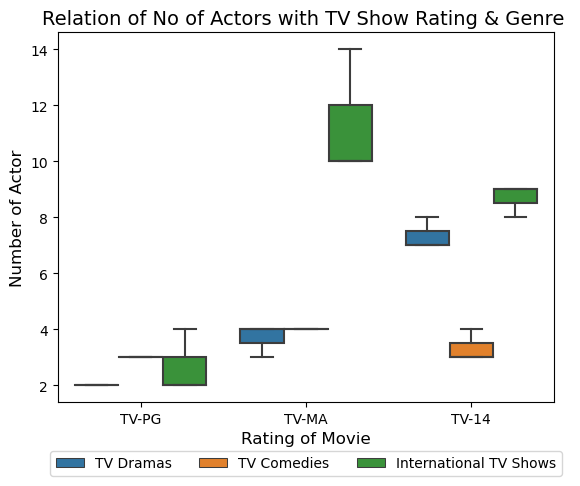

In [161]:
sns.boxplot(tv_actors, x='rating', y='tvshow_count', hue='genre')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc='lower center', borderaxespad=0, ncol=3)
plt.title('Relation of No of Actors with TV Show Rating & Genre ', fontsize=14)
plt.xlabel('Rating of Movie', fontsize=12)
plt.ylabel('Number of Actor', fontsize=12)
plt.show()

#### TV Show Director

In [162]:
tv_directors = actor_director_tv.groupby(['rating', 'genre', 'director']).aggregate(
    tvshow_count = ('title','nunique'),
    ).reset_index().sort_values(['rating', 'genre', 'tvshow_count'], ascending=False).reset_index(drop=True
    ).groupby(['rating', 'genre']).head(3).reset_index(drop=True
    )
tv_directors

,rating,genre,director,tvshow_count
0,TV-PG,TV Dramas,Ehtesham Uddin,1
1,TV-PG,TV Dramas,Everardo Gout,1
2,TV-PG,TV Dramas,Jay Chandrasekhar,1
3,TV-PG,TV Comedies,Jay Chandrasekhar,1
4,TV-PG,International TV Shows,Alastair Fothergill,2
5,TV-PG,International TV Shows,Ehtesham Uddin,1
6,TV-PG,International TV Shows,Estela Renner,1
7,TV-MA,TV Dramas,Abhishek Chaubey,1
8,TV-MA,TV Dramas,Aco Tenriyagelli,1
9,TV-MA,TV Dramas,Ahmet Katıksız,1


In [163]:
tv_directors.groupby('director').aggregate(
    repet=('tvshow_count', 'nunique'),
    movie_count=('tvshow_count', 'sum'),
    ).reset_index().sort_values(['repet', 'movie_count'], ascending=False).reset_index(drop=True)

,director,repet,movie_count
0,Hsu Fu-chun,2,4
1,Aco Tenriyagelli,1,3
2,Abhishek Chaubey,1,2
3,Alastair Fothergill,1,2
4,Ehtesham Uddin,1,2
5,Han Qing,1,2
6,Jay Chandrasekhar,1,2
7,Shin Won-ho,1,2
8,Stan Lathan,1,2
9,Adrien Lagier,1,1


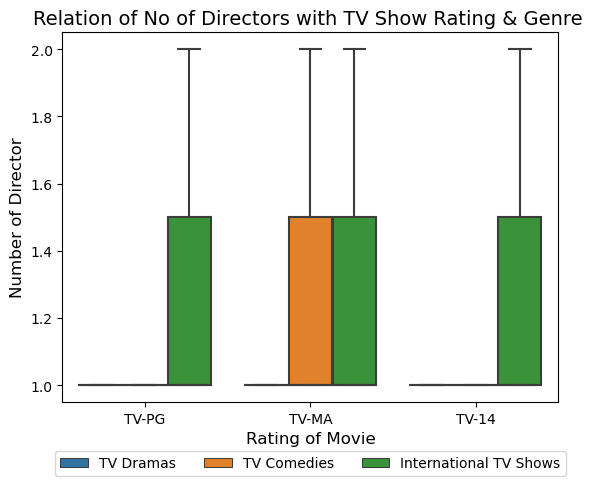

In [164]:
sns.boxplot(tv_directors, x='rating', y='tvshow_count', hue='genre')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc='lower center', borderaxespad=0, ncol=3)
plt.title('Relation of No of Directors with TV Show Rating & Genre ', fontsize=14)
plt.xlabel('Rating of Movie', fontsize=12)
plt.ylabel('Number of Director', fontsize=12)
plt.show()

###
> TV Show Insight

 * `'TV-MA', 'TV-14', 'TV-PG'` rated TV Shows are most popular outof `9` unique rating.
 * `'International TV Shows', 'TV-Dramas', 'TV-Comedies'` are most popular genre's outof `22` unique genre.
 * Actors:
    * `Takahiro Sakurai', 'Jun Fukuyama', 'Yuki Kaji'` belong to 'TV-MA' & 'International TV Shows' which are Rank 1 Rating & Genre.
    * `'Tay Ping Hui'` have 2 ranks with 17 TV Shows, who belongs to 'TV-14' Rating & 'International TV Shows', 'TV-Dramas' Genre.
 * Directors:
    * `'Shin Won-ho', 'Abhishek Chaubey', 'Aco Tenriyagelli'` belong to 'TV-MA' & 'International TV Shows' which are Rank 1 Rating & Genre.
    * `'Hsu Fu-chun'`have 2 ranks with 10 TV Shows, who belongs to 'TV-14' Rating & 'International TV Shows', 'TV Comedies' Genre.

> Business Insights
 * Higher number of Actors belongs to 'TV-MA' & 'International TV Shows'.
 * Popular Actors who belongs to 'TV-14' have higher number of TV Shows.
 * 'International TV Shows' have same number of Directors accross all TOP 3 Rating. Also 'TV Comedies' genre have same no of director with 'TV-MA' Rating. 
 * Popular Directors who belongs to 'TV-14' have higher number of TV Shows.
 
> Recommendations

 * 'Takahiro Sakurai', 'Jun Fukuyama', 'Tay Ping Hui' are more popular Actors.
 * 'Shin Won-ho', 'Abhishek Chaubey', 'Hsu Fu-chun' are more popular Director.
 * TV Show with above Actor & Director combination might have more popularity.


### Plot the Graph

In [165]:
movies = actor_director.copy().loc[
    (actor_director['rating'].isin(top_movie_rating['rating'])) & 
    (actor_director['genre'].isin(top_movie_genre['genre']))
    ].groupby(['type', 'rating', 'genre']).aggregate(
    actor_count = ('actor','nunique'),
    director_count = ('director','nunique'),
    ).reset_index(
    )
movies = movies.loc[(movies['actor_count']!=0) & (movies['director_count']!=0)]

tvshows = actor_director.copy().loc[
    (actor_director['rating'].isin(top_tv_rating['rating'])) & 
    (actor_director['genre'].isin(top_tv_genre['genre']))
    ].groupby(['type', 'rating', 'genre']).aggregate(
    actor_count = ('actor','nunique'),
    director_count = ('director','nunique'),
    ).reset_index(
    )
tvshows = tvshows.loc[(tvshows['actor_count']!=0) & (tvshows['director_count']!=0)]

In [166]:
print('Actors count for Movies among Top3 Rating & Genre Combination is',
      movies['actor_count'].min(), '-', movies['actor_count'].max())
print('Director count for Movies among Top3 Rating & Genre Combination is',
      movies['director_count'].min(), '-', movies['director_count'].max())
print('Actors count for TV Show among Top3 Rating & Genre Combination is',
      tvshows['actor_count'].min(), '-', tvshows['actor_count'].max())
print('Director count for TV Show among Top3 Rating & Genre Combination is',
      tvshows['director_count'].min(), '-', tvshows['director_count'].max())

Actors count for Movies among Top3 Rating & Genre Combination is 888 - 7007
Director count for Movies among Top3 Rating & Genre Combination is 99 - 1066
Actors count for TV Show among Top3 Rating & Genre Combination is 384 - 5703
Director count for TV Show among Top3 Rating & Genre Combination is 1 - 118


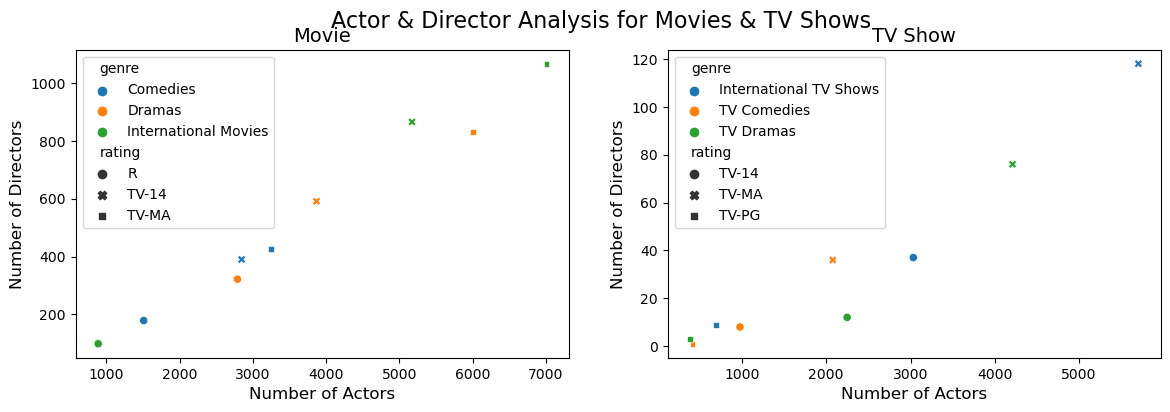

In [167]:
plt.figure(figsize=(14,4)).suptitle("Actor & Director Analysis for Movies & TV Shows",fontsize=16)

plt.subplot(1, 2, 1)
sns.scatterplot(movies, y='director_count', x='actor_count', hue='genre', style='rating')
plt.title('Movie', fontsize=14)
plt.xlabel('Number of Actors', fontsize=12)
plt.ylabel('Number of Directors', fontsize=12)

plt.subplot(1, 2, 2)
# plt.grid()
sns.scatterplot(tvshows, y='director_count', x='actor_count', hue='genre', style='rating')
plt.title('TV Show', fontsize=14)
plt.xlabel('Number of Actors', fontsize=12)
plt.ylabel('Number of Directors', fontsize=12)

plt.show()

###
> Insight

 * In `Movie` for each unique combination `Actor` count ranges between `888 to 7007` & `Director` count ranges between `99 - 1066`. 
 * In `TV Show` for each unique combination `Actor` count ranges between `384 - 5703` & `Director` count ranges between `1 - 118`.
 * 'TV-MA' with 'International Movies' Genre have highest number of Actors & Directors in `Movie` Category.
 * 'TV-MA' with 'International TV Show' Genre have highest number of Actors & Directors in `TV Show` Category.

> Business Insights
 * Overall, There is a `positive` Co-Relation between No of Actor & No of Director in both Movie & TV Show.
 * Number of Actor for TV Shows are far less than Movie i.e. 10x less, but for Directors the differance of 1300
 
> Recommendations

 * Movie or TV Show with International Genre are Mostly Popular.


## **<span style="color: Red;">Q5. Does Netflix has more focus on TV Shows than Movies in recent years</span>**

> Problem Statement

 * We need to find out `Percentage of change number of Movie vs TV Show added` to Netflix per year.
 * If Rate of Change in TV Show is higher then Movie's then, It states that Netflix has more focus on TV Shows than Movies

> Basic Matrics

 * Need to group the `netflix_consolidated` data set with `type` and `add_year`.
 * We will consider from `2014-Latest` and analyze rate of change.

In [168]:
type_year = netflix_consolidated.copy()
type_year = type_year.groupby(['type', 'add_year'])
type_year

###
> Pre Processing

 * `Group the Data set` with 'type','add_year' & aggregate as unique title count for each Combinations & store that in to '`change_in_content_per_year`'.
 * Group the `change_in_content_per_year` with 'type'.
 * Add a new column '`rate_of_change`' to `change_in_content_per_year` as `differance of content count` from previos year to current year for Movie & TV Show.
 * Add a new column '`pct_change`' to `change_in_content_per_year` as `percentage differance of content count` from previos year to current year for Movie & TV Show.
 * Replace Null valus for `rate_of_change & pct_change` column & sort it as descending order.
 * Plot the graph for add_year vs pct_change for both Movie & TV Show.
 

### Create the Dataset with Rate of Change & Percentage Change Column

In [169]:
change_in_content_per_year = type_year.aggregate(
    title_count = ('title','nunique'),
    ).reset_index().sort_values('title_count', ascending=False).reset_index(drop=True) # type: ignore
change_in_content_per_year.sort_values(['type', 'add_year'], inplace=True)
change_in_content_per_year.reset_index(drop=True, inplace=True)

grouped = change_in_content_per_year.groupby('type')
change_in_content_per_year['rate_of_change'] = grouped['title_count'].diff()
change_in_content_per_year['pct_change'] = round(grouped['title_count'].pct_change(),4)
change_in_content_per_year['rate_of_change'].fillna(0, inplace=True)
change_in_content_per_year['pct_change'].fillna(0, inplace=True)

change_in_content_per_year

,type,add_year,title_count,rate_of_change,pct_change
0,Movie,2008.0,1,0.0,0.0000
1,Movie,2009.0,2,1.0,1.0000
2,Movie,2010.0,1,-1.0,-0.5000
3,Movie,2011.0,13,12.0,12.0000
4,Movie,2012.0,3,-10.0,-0.7692
5,Movie,2013.0,6,3.0,1.0000
6,Movie,2014.0,19,13.0,2.1667
7,Movie,2015.0,56,37.0,1.9474
8,Movie,2016.0,253,197.0,3.5179
9,Movie,2017.0,839,586.0,2.3162


### Understanding of Data Set

In [170]:
change_in_content_per_year.shape

(28, 5)

In [171]:
change_in_content_per_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   type            28 non-null     category
 1   add_year        28 non-null     float64 
 2   title_count     28 non-null     int64   
 3   rate_of_change  28 non-null     float64 
 4   pct_change      28 non-null     float64 
dtypes: category(1), float64(3), int64(1)
memory usage: 1.1 KB


In [172]:
change_in_content_per_year.describe()

,add_year,title_count,rate_of_change,pct_change
count,28.000000,28.000000,28.000000,28.000000
mean,2014.500000,314.178571,53.428571,inf
std,4.105101,450.646865,160.911392,NaN
min,2008.000000,0.000000,-291.000000,-1.000000
25%,2011.000000,1.750000,0.000000,0.000000
50%,2014.500000,22.500000,3.000000,0.165850
75%,2018.000000,526.750000,84.750000,2.002225
max,2021.000000,1424.000000,586.000000,inf


In [173]:
change_in_content_per_year['add_year'].nunique()

14

In [174]:
change_in_content_per_year['add_year'].value_counts()

2008.0    2
2009.0    2
2010.0    2
2011.0    2
2012.0    2
2013.0    2
2014.0    2
2015.0    2
2016.0    2
2017.0    2
2018.0    2
2019.0    2
2020.0    2
2021.0    2
Name: add_year, dtype: int64

### Plot the Graph

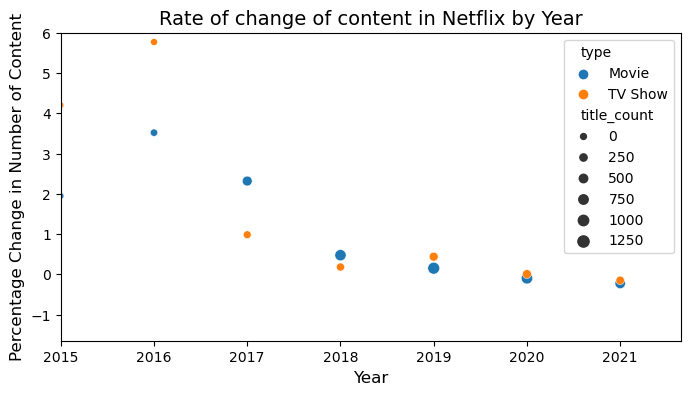

In [175]:
plt.figure(figsize=(8,4))

sns.scatterplot(change_in_content_per_year, x='add_year', y='pct_change', hue='type', size='title_count')
plt.title('Rate of change of content in Netflix by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Change in Number of Content', fontsize=12)
plt.xlim(left=2015)
plt.ylim(top=6)

plt.show()

###
> Insight

 * On year `2016` Maximum number of Movie & TV Shows Added to Netflix.
 * Though number of TV Show added each doesnot increases highly, but'Percentage change in Number of content Added' is higher since 2019.
 * Also It is observed that between `2016-2018` huge reduction in 'Percentage change in Number of content Added' is observed, though number of Content Added increases.
 * From `2018` upto `2021 (Latest year)` 'Percentage change in Number of content Added' Decreases gradually, but each year 'Percentage change in Number of content Added' for `TV Show`is higher then `Movie`.

> Business Insights
 * Considering `2019` to `2021` 'Percentage change in Number of content Added' is less then `1` for both Movie & TV Show.
 * But during these year more TV Show added in terms of Percentage then last year is higher than the Movie.
 * ALso during these year more Movies added then TV Show.
 
> Recommendations

 * Here the `Higher 'Percentage change in Number of TV Show Added' Than the Movie` means Netflix is more focused about TV Shows in recent years.
 * But `Number of Movies Added is higher than TV Shows` indicated, Market of Movie and TV Shows are different. 



## **<span style="color: Red;">Q6. What content is available in different countries?</span>**


> Problem Statement

 * Here we need to analyze that Number of content available in contries by 'Type', 'Rating' & 'Genre'.
 * We will consider only `Top 10` 'Contries' where Number of content produced is `Higher`.
 * Similarly, `Top 10` 'Rating' and 'Genre' are taken in to Consideration.

> Basic Matrics

 * Remove records where `Rating is Unknown` and convert 'Rating', 'Genre' and 'Country' to Object type.
 * Group it  with `'country', 'rating', 'genre', 'type'` and find the count of Contents as 'title_count'. Than sort it in same order.
 * Remove records where `Rating is Unknown` and convert 'Rating', 'Genre' and 'Country' to Object type.
 * Filter out and keep where 'title_count' is grater then '0' and with valid 'country'.

In [176]:
country_content_raw = netflix_consolidated.copy().loc[netflix_consolidated['rating']!='Unknown Rating']
country_content_raw['rating'] = country_content_raw['rating'].astype(object)
country_content_raw['genre'] = country_content_raw['genre'].astype(object)
country_content_raw['country'] = country_content_raw['country'].astype(object)

In [177]:
country_content = country_content_raw.groupby(['country', 'rating', 'genre', 'type']).aggregate(
    title_count = ('title','nunique'),
    ).reset_index().sort_values(['country', 'rating', 'genre', 'type'], ascending=False)
country_content = country_content.loc[(country_content['title_count']>0) & (country_content.country!="")].reset_index(drop=True)
country_content

,country,rating,genre,type,title_count
0,Zimbabwe,TV-MA,International Movies,Movie,1
1,Zimbabwe,TV-MA,Documentaries,Movie,1
2,Zimbabwe,TV-G,Romantic Movies,Movie,1
3,Zimbabwe,TV-G,International Movies,Movie,1
4,Zimbabwe,TV-G,Comedies,Movie,1
...,...,...,...,...,...
3423,Algeria,TV-14,Dramas,Movie,1
3424,Albania,TV-MA,International Movies,Movie,1
3425,Albania,TV-MA,Dramas,Movie,1
3426,Afghanistan,TV-MA,International Movies,Movie,1


### Understaing of Data Set

In [178]:
country_content.shape

(3428, 5)

In [179]:
country_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3428 entries, 0 to 3427
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   country      3428 non-null   object  
 1   rating       3428 non-null   object  
 2   genre        3428 non-null   object  
 3   type         3428 non-null   category
 4   title_count  3428 non-null   int64   
dtypes: category(1), int64(1), object(3)
memory usage: 110.7+ KB


In [180]:
country_content.describe()

,title_count
count,3428.000000
mean,6.424154
std,19.793383
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,508.000000


Hence, Title contains Outliers.

In [181]:
country_content['country'].nunique()

122

In [182]:
country_content['country'].value_counts()

United States     259
United Kingdom    173
Canada            158
India             134
France            128
                 ... 
Nicaragua           1
Bahamas             1
Bermuda             1
Botswana            1
Ecuador             1
Name: country, Length: 122, dtype: int64

In [183]:
country_content['type'].nunique()

2

In [184]:
country_content['type'].value_counts()

Movie      2428
TV Show    1000
Name: type, dtype: int64

In [185]:
country_content['rating'].nunique()

17

In [186]:
country_content['rating'].value_counts()

TV-MA       972
TV-14       681
TV-PG       460
R           301
PG-13       260
TV-G        174
PG          157
NR          121
TV-Y7       116
TV-Y         98
G            51
NC-17        13
TV-Y7-FV     13
UR            8
84 min        1
74 min        1
66 min        1
Name: rating, dtype: int64

In [187]:
country_content['genre'].nunique()

42

In [188]:
country_content['genre'].value_counts()

International Movies            357
Dramas                          322
Comedies                        234
Documentaries                   191
Independent Movies              176
Action & Adventure              154
Romantic Movies                 141
Children & Family Movies        137
International TV Shows          131
Thrillers                       122
TV Dramas                       103
TV Comedies                     102
Music & Musicals                 97
Sci-Fi & Fantasy                 94
Horror Movies                    90
Sports Movies                    89
Crime TV Shows                   79
Kids' TV                         69
Romantic TV Shows                62
Docuseries                       55
TV Action & Adventure            50
Classic Movies                   46
Reality TV                       43
Faith & Spirituality             42
British TV Shows                 42
LGBTQ Movies                     38
TV Mysteries                     36
TV Sci-Fi & Fantasy         

###
> Pre Processing

 * Find `Top 10` Country, Rating & Genre.
 * Than filter the 'country_content' with 'country', 'rating', 'genre' which are belongs to TOP 10 and store as 'top_country_content'.
 * Than find out Content count for Top 10 country for each Type, Rating and Genre.
 * Then Plot the Graph represting count of Content for each type, rating & genre.

### Find Top Country, Rating and Genre

In [189]:
top_country = country_content.groupby('country').aggregate(
    title_count = ('title_count','sum'),
    ).reset_index().sort_values(['title_count'], ascending=False).reset_index(drop=True
    ).head(10)

In [190]:
top_rating = country_content.groupby('rating').aggregate(
    title_count = ('title_count','sum'),
    ).reset_index().sort_values(['title_count'], ascending=False).reset_index(drop=True
    ).head(10)

In [191]:
top_genre = country_content.groupby('genre').aggregate(
    title_count = ('title_count','sum'),
    ).reset_index().sort_values(['title_count'], ascending=False).reset_index(drop=True
    ).head(10)

### Find combination of Top Country, Rating, Genre

In [192]:
top_country_content =  country_content.loc[
    (country_content['country'].isin(top_country['country'])) & 
    (country_content['rating'].isin(top_rating['rating'])) & 
    (country_content['genre'].isin(top_genre['genre']))
    ].reset_index(drop=True)
top_country_content

,country,rating,genre,type,title_count
0,United States,TV-Y7,Comedies,Movie,19
1,United States,TV-Y7,Children & Family Movies,Movie,50
2,United States,TV-Y,Dramas,Movie,2
3,United States,TV-Y,Comedies,Movie,15
4,United States,TV-Y,Children & Family Movies,Movie,47
...,...,...,...,...,...
529,Canada,NR,International Movies,Movie,2
530,Canada,NR,Independent Movies,Movie,1
531,Canada,NR,Dramas,Movie,1
532,Canada,NR,Documentaries,Movie,1


### Find Content count for Top 10 Country by Type, Rating & Genre 

In [193]:
country_type = top_country_content.groupby(['type', 'country']).aggregate(
    title_count = ('title_count','sum'),
    ).reset_index().sort_values(['title_count'], ascending=False).reset_index(drop=True
    )

In [194]:
country_rating = top_country_content.groupby(['rating', 'country']).aggregate(
    title_count = ('title_count','sum'),
    ).reset_index().sort_values(['title_count'], ascending=False).reset_index(drop=True
    )

In [195]:
country_genre = top_country_content.groupby(['genre', 'country']).aggregate(
    title_count = ('title_count','sum'),
    ).reset_index().sort_values(['title_count'], ascending=False).reset_index(drop=True
    )

### Plot the Graph

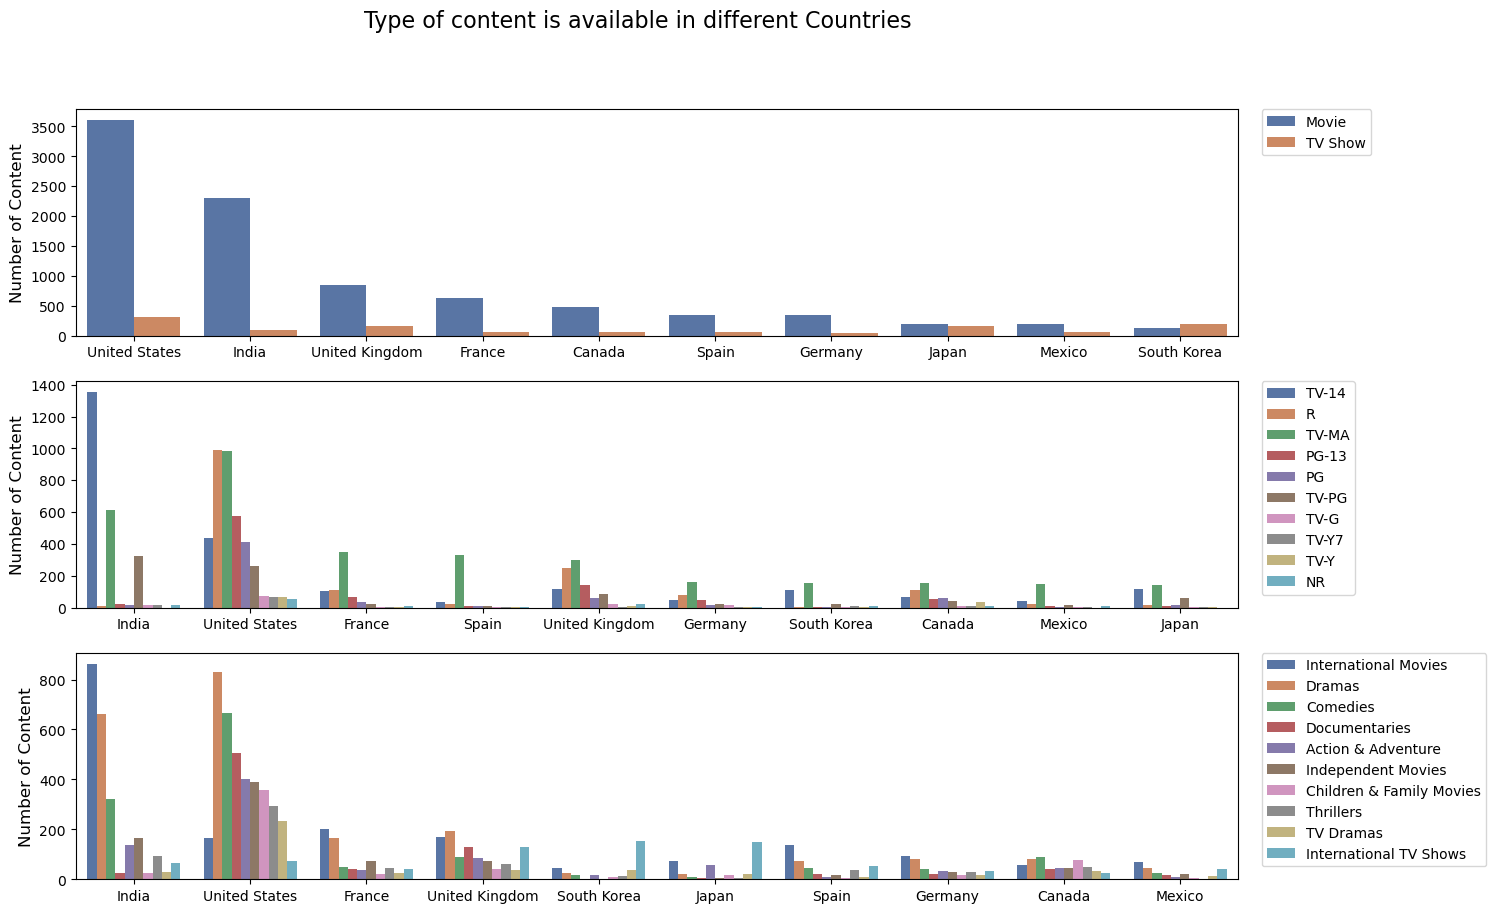

In [196]:
plt.figure(figsize=(15,10)).suptitle("Type of content is available in different Countries",fontsize=16)

plt.subplot(3, 1, 1)
sns.barplot(country_type, x='country', y='title_count', hue='type', dodge=True, palette="deep")   
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('', fontsize=12)
plt.ylabel('Number of Content', fontsize=12)

plt.subplot(3, 1, 2)
sns.barplot(country_rating, x='country', y='title_count', hue='rating', dodge=True, palette="deep")    
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('', fontsize=12)
plt.ylabel('Number of Content', fontsize=12)

plt.subplot(3, 1, 3)
sns.barplot(country_genre, x='country', y='title_count', hue='genre', dodge=True, palette="deep")    
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('', fontsize=12)
plt.ylabel('Number of Content', fontsize=12)


plt.show()

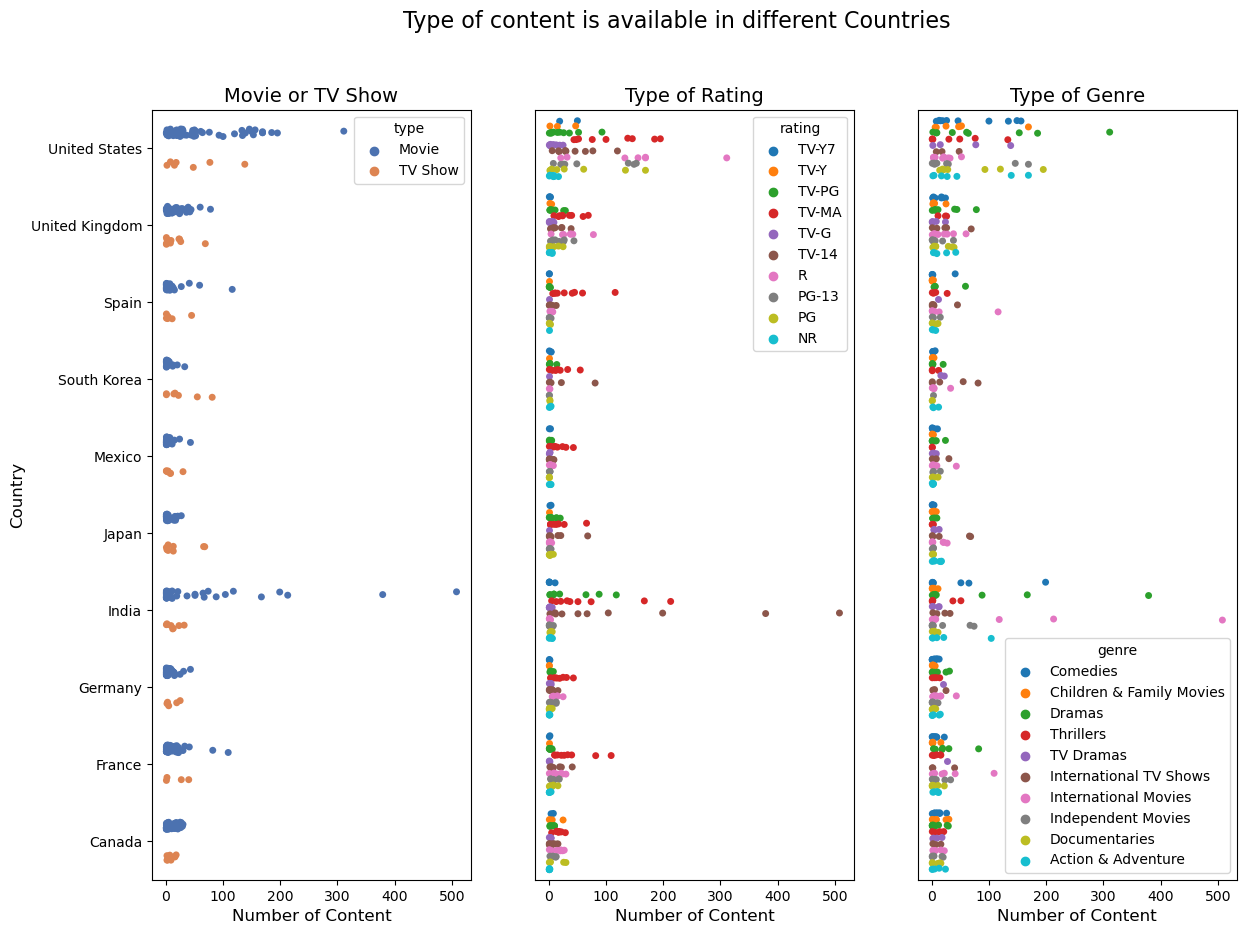

In [197]:
plt.figure(figsize=(14,10)).suptitle("Type of content is available in different Countries",fontsize=16)

plt.subplot(1, 3, 1)
sns.stripplot(top_country_content, y='country', x='title_count', hue='type', s=5, dodge=True, palette="deep")
plt.title('Movie or TV Show', fontsize=14)
plt.xlabel('Number of Content', fontsize=12)
plt.ylabel('Country', fontsize=12)

plt.subplot(1, 3, 2)
sns.stripplot(top_country_content, y='country', x='title_count', hue='rating', s=5, dodge=True)
plt.title('Type of Rating', fontsize=14)
plt.xlabel('Number of Content', fontsize=12)
plt.ylabel('', fontsize=12)
plt.yticks([])

plt.subplot(1, 3, 3)
sns.stripplot(top_country_content, y='country', x='title_count', hue='genre', s=5, dodge=True)
plt.title('Type of Genre', fontsize=14)
plt.xlabel('Number of Content', fontsize=12)
plt.ylabel('', fontsize=12)
plt.yticks([])

plt.show()

###
> Insight

 * `'South Korea'` have higher number of TV Show then Movie.
 * 'United States' and 'India' have higher number of Movies then the TV Show.
 * `'United States'` have equivalent number of `'TV-MA' & 'R'` rated Contents.
 * 'India' have highest number of `'TV-14'` Content.
 * 'France', 'Spain' & 'United Kingdom' have equivalent number of `'TV-MA'` Content.
 * 'India' have highest number of '`International Movies'`.
 * 'United States' have higher number of `'Dramas'`.
 * 'United Kingdom', 'South Korea' & 'Japan' have equivalent number of `'International TV Shows'`.  

> Business Insights
 * `'United States'` have higher popularity for TV-MA & R rated Movies, which are belongs to Drama & Comedies Genre.
 * `'India'` have higher popularity for TV-14 & V-MA rated Movies, which are belongs to International Movies & Dramas Genre.
 * `'United Kingdom'` have higher popularity for TV-MA & R rated Movies, which are belongs to International Movies & Dramas Genre.
 * `'South Korea'` have higher popularity for TV-MA & TV-14 rated TV Shows, which are belongs to International TV Shows Genre.
 * India & United States have higer outliers.
 
> Recommendations

 * TV shows from South Korea & Japan are more popular.
 * Movies from United States and India are more popular.


## END